In [1]:
!which python

/c/Users/junec/AppData/Local/Programs/Python/Python38/python


In [2]:
import struct 
struct.calcsize("P")*8

32

In [3]:
# !pip list

In [4]:
# !pip install openpyxl

In [5]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
from matplotlib import rcParams
from operator import itemgetter
from typing import Callable, Dict, List, Set, Tuple

In [6]:
from util import load_data_from_txt, calculate_derivative,convert_timestamp2hour
from baseline import detect_breakpoints, detect_breakpoints_2, detect_breakpoints_3, detect_breakpoints_all
# from plot import group_index, plot_4_metrics,plot_4_metrics_details
from plot import group_index

In [7]:
input_file="../data_input/Synthetic_Data.xlsx"
pressure_sheet="Pressure"
pressure_df = pd.DataFrame(pd.read_excel(input_file, sheet_name=pressure_sheet))
display(pressure_df)
start_timestamp=pressure_df["Date"][0]
pressure_df["Date"]=convert_timestamp2hour(start_timestamp,pressure_df["Date"])
pressure_df

,Date,Pressure (psia)
0,2019-01-01 00:00:00,2000.000000
1,2019-01-01 00:00:22,2092.738568
2,2019-01-01 00:00:44,2125.952010
3,2019-01-01 00:01:05,2149.773050
4,2019-01-01 00:01:27,2168.851204
...,...,...
3514,2019-09-05 10:03:05,2327.338989
3515,2019-09-06 16:20:44,2322.764893
3516,2019-09-07 22:38:24,2318.352641
3517,2019-09-09 04:56:04,2314.092149


,Date,Pressure (psia)
0,0.000000,2000.000000
1,0.006111,2092.738568
2,0.012222,2125.952010
3,0.018056,2149.773050
4,0.024167,2168.851204
...,...,...
3514,5938.051389,2327.338989
3515,5968.345556,2322.764893
3516,5998.640000,2318.352641
3517,6028.934444,2314.092149


In [8]:
input_file="../data_input/Synthetic_Data.xlsx"
rate_sheet="Rate"
rate_df = pd.DataFrame(pd.read_excel(input_file, sheet_name=rate_sheet))
display(rate_df)
rate_df["Time@end"]=convert_timestamp2hour(start_timestamp,rate_df["Time@end"])
rate_df

,Time@end,Liquid rate (STB/D)
0,2019-01-07 18:59:30,-6742.395145
1,2019-01-11 13:13:00,-8513.514104
2,2019-01-12 00:21:30,0.000000
3,2019-01-12 10:11:30,-5548.484464
4,2019-01-13 08:43:00,-8951.244013
...,...,...
90,2019-07-06 01:47:35,0.107707
91,2019-07-06 01:50:05,0.105123
92,2019-07-06 01:54:35,-1909.311284
93,2019-07-30 18:52:05,-5453.279913


,Time@end,Liquid rate (STB/D)
0,0.000000,-6742.395145
1,253.216667,-8513.514104
2,264.358333,0.000000
3,274.191667,-5548.484464
4,296.716667,-8951.244013
...,...,...
90,4465.793056,0.107707
91,4465.834722,0.105123
92,4465.909722,-1909.311284
93,5058.868056,-5453.279913


In [9]:
#calculate first & second derivative
x_coordinate=pressure_df["Date"]
y_coordinate=pressure_df["Pressure (psia)"]
first_order_derivative=calculate_derivative(x_coordinate,y_coordinate)

x_coordinate=pressure_df["Date"]
y_coordinate=first_order_derivative
second_order_derivative=calculate_derivative(x_coordinate,y_coordinate)

#add first and second derivative to pressure_df dataframe
pressure_df["first_order_derivative"]=first_order_derivative
pressure_df["second_order_derivative"]=second_order_derivative
pd.set_option('display.max_rows', pressure_df.shape[0]+1)
display(pressure_df)

,Date,Pressure (psia),first_order_derivative,second_order_derivative
0,0.000000,2000.000000,15175.401994,-1.593896e+06
1,0.006111,2092.738568,5434.926885,-2.211251e+05
2,0.012222,2125.952010,4083.606969,-1.648675e+05
3,0.018056,2149.773050,3121.879672,-7.945161e+04
4,0.024167,2168.851204,2636.342081,-5.537004e+04
5,0.030278,2184.962183,2297.969596,-4.122935e+04
6,0.036389,2199.005331,2046.012468,-1.770213e+04
7,0.042500,2211.508740,1937.832773,-4.218130e+04
8,0.048333,2222.812765,1691.775189,-2.056444e+04
9,0.054444,2233.151391,1566.103590,-1.945730e+04


In [10]:
breakpoints=detect_breakpoints_3(first_order_derivative,second_order_derivative)
print(len(breakpoints))
print(breakpoints)

2528.518177413723 272776.92851259984
57
[107, 164, 243, 328, 375, 446, 546, 568, 592, 611, 644, 713, 771, 820, 887, 953, 1036, 1101, 1179, 1254, 1319, 1396, 1456, 1513, 1598, 1648, 1719, 1784, 1875, 1938, 2017, 2073, 2137, 2156, 2185, 2247, 2315, 2369, 2433, 2487, 2552, 2610, 2698, 2713, 2746, 2764, 2789, 2807, 2835, 2916, 2965, 3044, 3101, 3240, 3284, 3368, 3411]


In [11]:
faulty_detected=[592,611,2137,2156,2698,2713,2746,2764,2789,2807]
print("faulty_detected:",len(faulty_detected))
print("accuracy:",(len(breakpoints)-len(faulty_detected))/len(breakpoints))

faulty_detected: 10
accuracy: 0.8245614035087719


In [12]:
# fig, ax = plt.subplots()
# # ax.plot(range(20))
# # ax.axvspan(8, 14, alpha=0.5, color='red')
# for fill_area in [(592,611),(2137,2156),(2698,2713),(2746,2764),(2789,2807)]:    
#     ax.axvspan(pressure_df["Date"][fill_area[0]], pressure_df["Date"][fill_area[1]], alpha=0.5, color='red')
# #     ax.fill_betweenx(4800,pressure_df["Date"][fill_area[0]], pressure_df["Date"][fill_area[1]], color='C1', alpha=0.3)

# plt.show()

In [13]:
# a=[592,611,2137,2156,2698,2713,2746,2764,2789,2807]
# if 592 in a:
#     print("--")
# breakpoint=2698

# if a.index(breakpoint)%2==0:
#     area=[a[a.index(breakpoint)],a[a.index(breakpoint)+1]] 
#     print(area)

In [14]:
# def plot_4_metrics(pressure_df:pd.DataFrame,
#                    rate_df:pd.DataFrame,
#                    breakpoints:List[int],
#                    colum_names:Dict[str,List[str]]
#                    ={"pressure":["Elapsed time","Data","first_order_derivative","second_order_derivative"],
#                     "rate":["Elapsed time","Liquid rate"]})->None:
    
#     pressure_time, pressure_measure,first_order_derivative,second_order_derivative=colum_names["pressure"]
#     rate_time, rate_measure = colum_names["rate"]
#     vline_color="cyan"
    
#     plt.close('all')
#     # plt.figure()
#     rcParams.update({'figure.autolayout': True})
#     fig, axs = plt.subplots(nrows=4, sharex=True, dpi=100,figsize=(20,14), gridspec_kw={'height_ratios': [5, 3,3,3]})
#     fig.suptitle('pressure ~ rate ~ first derivative ~ second derivative', 
#               **{'family': 'Arial Black', 'size': 22, 'weight': 'bold'})
 
#     #plot pressure and breakpoints
#     axs[0].scatter(x=pressure_df[pressure_time],y=pressure_df[pressure_measure],color='red',s=3**2) 
#     axs[0].set_ylabel(pressure_measure,fontsize=16)
 
#     for breakpoint_index in breakpoints:
# #         axs[0].text(pressure_df[pressure_time][breakpoint_index], .5, f'{breakpoint_index}', rotation=70)
#         axs[0].axvline(x=pressure_df[pressure_time][breakpoint_index],color=vline_color)
                
                

#     #plot rate and breakpoints       
#     start_time=pressure_df.iloc[0][pressure_time]
#     end_time=pressure_df.iloc[-1][pressure_time]
#     rate_df=rate_df.loc[(rate_df[rate_time] >= start_time) & (rate_df[rate_time] <= end_time)]

#     axs[1].scatter(x=rate_df[rate_time],y=rate_df[rate_measure],color='orangered',s=4**2) 
#     axs[1].set_ylabel(rate_measure,fontsize=16)
#     for breakpoint_index in breakpoints:
#         axs[1].text(pressure_df[pressure_time][breakpoint_index], .5, f'{breakpoint_index}', rotation=70)
#         axs[1].axvline(x=pressure_df[pressure_time][breakpoint_index],color=vline_color)
            

#     #plot first derivative and breakpoints
#     axs[2].scatter(x=pressure_df[pressure_time],y=pressure_df[first_order_derivative],color='blue',s=3**2) 
#     axs[2].set_ylabel(first_order_derivative,fontsize=16)

#     for breakpoint_index in breakpoints:
#             axs[2].axvline(x=pressure_df[pressure_time][breakpoint_index],color=vline_color)
   

#     #plot second derivative and breakpoints
#     axs[3].scatter(x=pressure_df[pressure_time],y=pressure_df[second_order_derivative],color='green',s=3**2) 
#     axs[3].set_ylabel(second_order_derivative,fontsize=16)
#     for breakpoint_index in breakpoints:
#             axs[3].axvline(x=pressure_df[pressure_time][breakpoint_index],color=vline_color)
    
#     plt.show()       
#     return None
    

In [15]:
# colum_names ={"pressure":["Date","Pressure (psia)","first_order_derivative","second_order_derivative"],
#                     "rate":["Time@end","Liquid rate (STB/D)"]}

# plot_4_metrics(pressure_df,
#                rate_df,
#                breakpoints,
#                colum_names)

In [16]:
def plot_breakpoints(ax,ax_index,breakpoints,faulty_detectedBreakpoints,pressure_df,pressure_time,vline_color)->None:
    for breakpoint in breakpoints:          
        if len(faulty_detectedBreakpoints)==0:
            if ax_index==1:
                ax.text(pressure_df[pressure_time][breakpoint], .5, f'{breakpoint}', rotation=70)
                ax.axvline(x=pressure_df[pressure_time][breakpoint],color=vline_color)
            else:
                ax.axvline(x=pressure_df[pressure_time][breakpoint],color=vline_color)
        else:       
            if breakpoint in faulty_detectedBreakpoints:
                #plot faulty detected transients
                temp_index=faulty_detectedBreakpoints.index(breakpoint)
                if temp_index%2==0:
                    print("breakpoint,temp_index",breakpoint,temp_index)
                    faulty_detected_transient=[faulty_detectedBreakpoints[temp_index],faulty_detectedBreakpoints[temp_index+1]] 
                else:
                    faulty_detected_transient=[faulty_detectedBreakpoints[temp_index-1],faulty_detectedBreakpoints[temp_index]] 
                print("faulty_detected_transient",faulty_detected_transient)
                
                #if a transient is divided into two subplot
                if faulty_detected_transient[0]<pressure_df.index[0]:
                    faulty_detected_transient[0]=pressure_df.index[0]
                if faulty_detected_transient[1]>pressure_df.index[-1]:
                    faulty_detected_transient[1]=pressure_df.index[-1]
                print("pressure_df[pressure_time][faulty_detected_transient[0]],",pressure_df[pressure_time][faulty_detected_transient[0]])
                print("pressure_df[pressure_time][faulty_detected_transient[1]],",pressure_df[pressure_time][faulty_detected_transient[1]])
                ax.axvspan(pressure_df[pressure_time][faulty_detected_transient[0]], pressure_df[pressure_time][faulty_detected_transient[1]], alpha=0.5, color='magenta')
            else:
                ax.axvline(x=pressure_df[pressure_time][breakpoint],color=vline_color)
                
        
    return None
    

In [17]:
# def plot_4_metrics(pressure_df:pd.DataFrame,
#                    rate_df:pd.DataFrame,
#                    breakpoints:List[int],
#                    faulty_detectedBreakpoints:List[int],
#                    colum_names:Dict[str,List[str]]
#                    ={"pressure":["Elapsed time","Data","first_order_derivative","second_order_derivative"],
#                     "rate":["Elapsed time","Liquid rate"]})->None:
    
#     pressure_time, pressure_measure,first_order_derivative,second_order_derivative=colum_names["pressure"]
#     rate_time, rate_measure = colum_names["rate"]
#     vline_color="cyan"
    
#     plt.close('all')
#     rcParams.update({'figure.autolayout': True})
#     fig, axs = plt.subplots(nrows=4, sharex=True, dpi=100,figsize=(20,15), gridspec_kw={'height_ratios': [5, 3,3,3]})
#     fig.suptitle('pressure ~ rate ~ first derivative ~ second derivative', 
#               **{'family': 'Arial Black', 'size': 22, 'weight': 'bold'},x=0.5, y=1.005)
    

#     #plot pressure and breakpoints
#     axs[0].scatter(x=pressure_df[pressure_time],y=pressure_df[pressure_measure],color='red',s=3**2) 
#     axs[0].set_ylabel(pressure_measure,fontsize=16) 
#     plot_breakpoints(axs[0],0,breakpoints,faulty_detectedBreakpoints,pressure_df,pressure_time,vline_color)
 
                
            
#     #plot rate and breakpoints       
# #     start_time=pressure_df.iloc[0][pressure_time]
# #     end_time=pressure_df.iloc[-1][pressure_time]
# #     rate_df=rate_df.loc[(rate_df[rate_time] >= start_time) & (rate_df[rate_time] <= end_time)]

#     axs[1].scatter(x=rate_df[rate_time],y=rate_df[rate_measure],color='orangered',s=4**2) 
#     axs[1].set_ylabel(rate_measure,fontsize=16)
#     plot_breakpoints(axs[1],1,breakpoints,faulty_detectedBreakpoints,pressure_df,pressure_time,vline_color)

            

#     #plot first derivative and breakpoints
#     axs[2].scatter(x=pressure_df[pressure_time],y=pressure_df[first_order_derivative],color='blue',s=3**2) 
#     axs[2].set_ylabel(first_order_derivative,fontsize=16)
#     plot_breakpoints(axs[2],2,breakpoints,faulty_detectedBreakpoints,pressure_df,pressure_time,vline_color)

   

#     #plot second derivative and breakpoints
#     axs[3].scatter(x=pressure_df[pressure_time],y=pressure_df[second_order_derivative],color='green',s=3**2) 
#     axs[3].set_ylabel(second_order_derivative,fontsize=16)
#     plot_breakpoints(axs[3],3,breakpoints,faulty_detectedBreakpoints,pressure_df,pressure_time,vline_color)

#     fig.subplots_adjust(bottom=0.1, top=0.9)
#     plt.show()       
#     return None
    

In [18]:
def plot_4_metrics(pressure_df:pd.DataFrame,
                   rate_df:pd.DataFrame,
                   breakpoints:List[int],
                   faulty_detectedBreakpoints:List[int],
                   colum_names:Dict[str,List[str]]
                   ={"pressure":["Elapsed time","Data","first_order_derivative","second_order_derivative"],
                    "rate":["Elapsed time","Liquid rate"]})->None:
    
    pressure_time, pressure_measure,first_order_derivative,second_order_derivative=colum_names["pressure"]
    rate_time, rate_measure = colum_names["rate"]
    vline_color="cyan"
    
    plt.close('all')
    rcParams.update({'figure.autolayout': True})
    fig, axs = plt.subplots(nrows=4, sharex=True, dpi=100,figsize=(20,15), gridspec_kw={'height_ratios': [5, 3,3,3]})
    fig.suptitle('pressure ~ rate ~ first derivative ~ second derivative', 
              **{'family': 'Arial Black', 'size': 22, 'weight': 'bold'},x=0.5, y=1.005)
    
    x_coordinates=[pressure_df[pressure_time],
                   rate_df[rate_time],
                   pressure_df[pressure_time],
                   pressure_df[pressure_time]]
    y_coordinates=[pressure_df[pressure_measure],
                   rate_df[rate_measure],
                   pressure_df[second_order_derivative],
                   pressure_df[second_order_derivative]]
    scatter_colors=['red','orangered','blue','green']
    scatter_sizes=[3**2,4**2,3**2,3**2]
    
    for i,(ax, x,y,color,size) in enumerate(zip(axs, x_coordinates,y_coordinates,scatter_colors,scatter_sizes)):
        ax.scatter(x=x,y=y,color=color,s=size) 
        ax.set_ylabel(pressure_measure,fontsize=16) 
        plot_breakpoints(ax,i,breakpoints,faulty_detectedBreakpoints,pressure_df,pressure_time,vline_color)
    
#     #plot pressure and breakpoints
#     axs[0].scatter(x=pressure_df[pressure_time],y=pressure_df[pressure_measure],color='red',s=3**2) 
#     axs[0].set_ylabel(pressure_measure,fontsize=16) 
#     plot_breakpoints(axs[0],0,breakpoints,faulty_detectedBreakpoints,pressure_df,pressure_time,vline_color)
 
                
            
#     #plot rate and breakpoints       
# #     start_time=pressure_df.iloc[0][pressure_time]
# #     end_time=pressure_df.iloc[-1][pressure_time]
# #     rate_df=rate_df.loc[(rate_df[rate_time] >= start_time) & (rate_df[rate_time] <= end_time)]

#     axs[1].scatter(x=rate_df[rate_time],y=rate_df[rate_measure],color='orangered',s=4**2) 
#     axs[1].set_ylabel(rate_measure,fontsize=16)
#     plot_breakpoints(axs[1],1,breakpoints,faulty_detectedBreakpoints,pressure_df,pressure_time,vline_color)

            

#     #plot first derivative and breakpoints
#     axs[2].scatter(x=pressure_df[pressure_time],y=pressure_df[first_order_derivative],color='blue',s=3**2) 
#     axs[2].set_ylabel(first_order_derivative,fontsize=16)
#     plot_breakpoints(axs[2],2,breakpoints,faulty_detectedBreakpoints,pressure_df,pressure_time,vline_color)

   

#     #plot second derivative and breakpoints
#     axs[3].scatter(x=pressure_df[pressure_time],y=pressure_df[second_order_derivative],color='green',s=3**2) 
#     axs[3].set_ylabel(second_order_derivative,fontsize=16)
#     plot_breakpoints(axs[3],3,breakpoints,faulty_detectedBreakpoints,pressure_df,pressure_time,vline_color)

    fig.subplots_adjust(bottom=0.1, top=0.9)
    plt.show()       
    return None
    

breakpoint,temp_index 592 0
faulty_detected_transient [592, 611]
pressure_df[pressure_time][faulty_detected_transient[0]], 571.25
pressure_df[pressure_time][faulty_detected_transient[1]], 576.575
faulty_detected_transient [592, 611]
pressure_df[pressure_time][faulty_detected_transient[0]], 571.25
pressure_df[pressure_time][faulty_detected_transient[1]], 576.575
breakpoint,temp_index 2137 2
faulty_detected_transient [2137, 2156]
pressure_df[pressure_time][faulty_detected_transient[0]], 2543.8016666666667
pressure_df[pressure_time][faulty_detected_transient[1]], 2549.3016666666667
faulty_detected_transient [2137, 2156]
pressure_df[pressure_time][faulty_detected_transient[0]], 2543.8016666666667
pressure_df[pressure_time][faulty_detected_transient[1]], 2549.3016666666667
breakpoint,temp_index 2698 4
faulty_detected_transient [2698, 2713]
pressure_df[pressure_time][faulty_detected_transient[0]], 3135.6183333333333
pressure_df[pressure_time][faulty_detected_transient[1]], 3136.701666666667


findfont: Font family ['Arial Black'] not found. Falling back to DejaVu Sans.


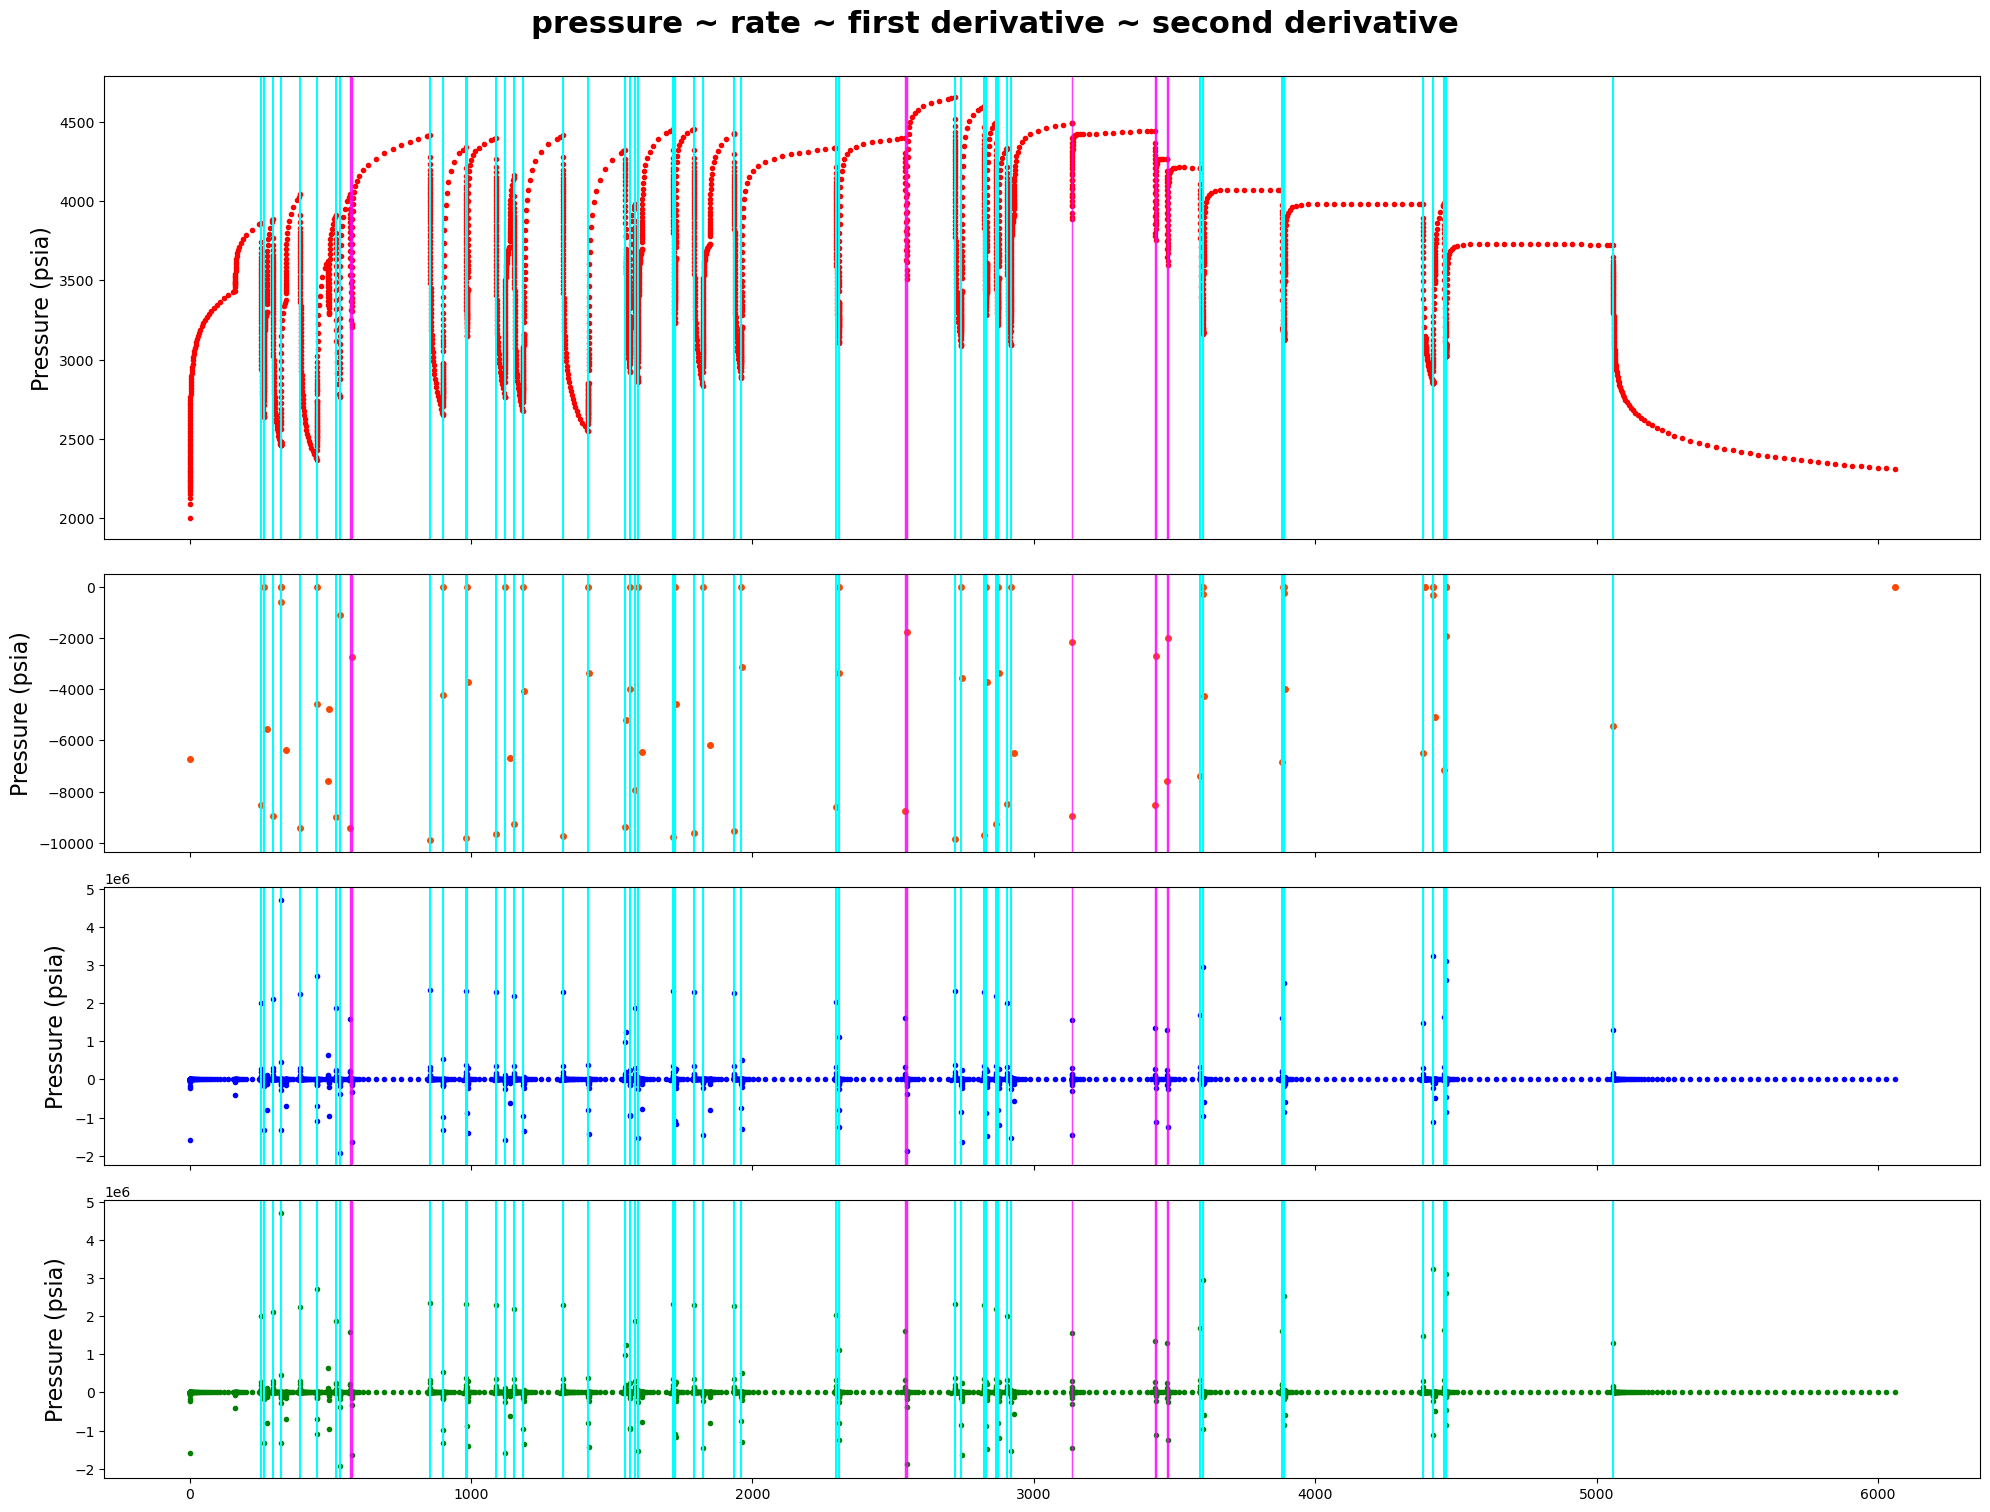

In [19]:
colum_names ={"pressure":["Date","Pressure (psia)","first_order_derivative","second_order_derivative"],
                    "rate":["Time@end","Liquid rate (STB/D)"]}
faulty_detectedBreakpoints=[592,611,2137,2156,2698,2713,2746,2764,2789,2807]
# faulty_detectedBreakpoints=[]
plot_4_metrics(pressure_df,
               rate_df,
               breakpoints,
               faulty_detectedBreakpoints,
               colum_names)

In [20]:
data_inOneRow=400
sub_pressure_df = [pressure_df.iloc[x:x+data_inOneRow,:] for x in range(0, len(pressure_df), data_inOneRow)]
print(sub_pressure_df[1]["Date"][401])
sub_pressure_df[1]["Date"]
sub_pressure_df[1].iloc[0]
sub_pressure_df[1].index[0]
# sub_pressure_df[1].index

394.1361111111111


400

In [21]:
def plot_4_metrics_details(data_inOneRow:int,
                           pressure_df:pd.DataFrame,
                           rate_df:pd.DataFrame,
                           breakpoints:List[int],
                           faulty_detectedBreakpoints:List[int],
                           colum_names:Dict[str,List[str]]
                               ={"pressure":["Elapsed time","Data","first_order_derivative","second_order_derivative"],
                                "rate":["Elapsed time","Liquid rate"]})->None:
    
    pressure_time, pressure_measure,first_order_derivative,second_order_derivative=colum_names["pressure"]
    rate_time, rate_measure = colum_names["rate"]
    
    size=len(pressure_df)
    sub_pressure_df = [pressure_df.iloc[x:x+data_inOneRow,:] for x in range(0, len(pressure_df), data_inOneRow)]
    grouped_breakpoints=group_index(breakpoints, 0, size, data_inOneRow)
#     print(grouped_breakpoints)
    print(len(grouped_breakpoints))
    count_breakpoints=0

    for sub_pressure_df,sub_breakpoints in zip(sub_pressure_df,grouped_breakpoints):
        count_breakpoints+=len(sub_breakpoints)
            
        #extract rate data for subplot     
        start_time=sub_pressure_df.iloc[0][pressure_time]
        end_time=sub_pressure_df.iloc[-1][pressure_time]
        sub_rate_df=rate_df.loc[(rate_df[rate_time] >= start_time) & (rate_df[rate_time] <= end_time)]
        
        plot_4_metrics(sub_pressure_df,
                       sub_rate_df,
                       sub_breakpoints,
                       faulty_detectedBreakpoints,
                       colum_names)
    print("count_breakpoints",count_breakpoints)
    return None

9


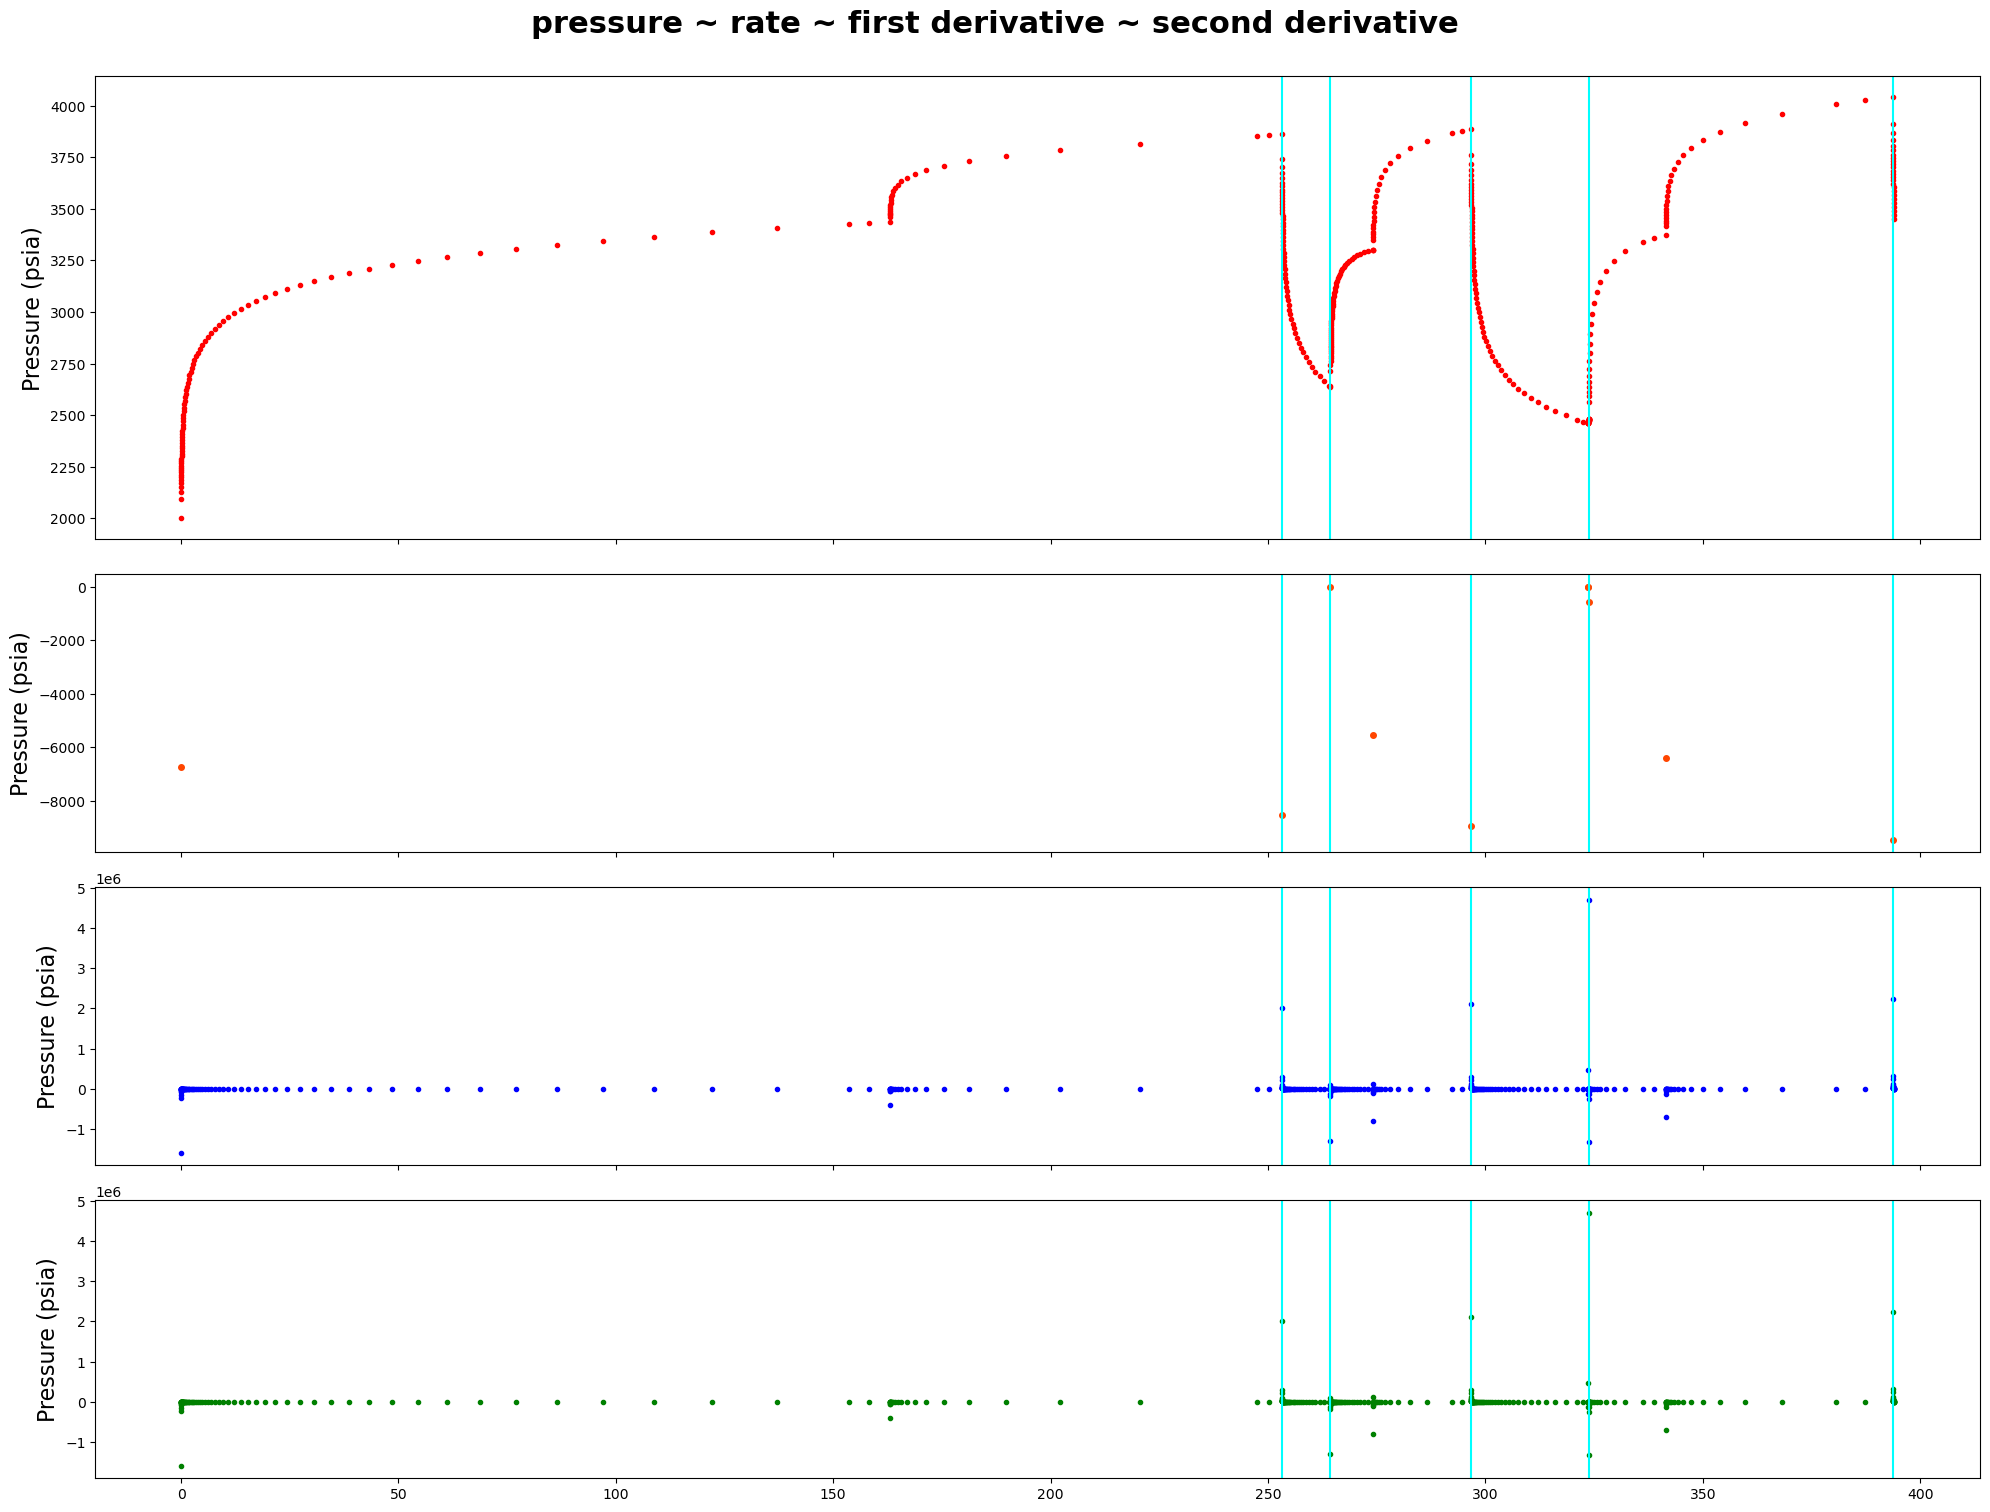

breakpoint,temp_index 592 0
faulty_detected_transient [592, 611]
pressure_df[pressure_time][faulty_detected_transient[0]], 571.25
pressure_df[pressure_time][faulty_detected_transient[1]], 576.575
faulty_detected_transient [592, 611]
pressure_df[pressure_time][faulty_detected_transient[0]], 571.25
pressure_df[pressure_time][faulty_detected_transient[1]], 576.575
breakpoint,temp_index 592 0
faulty_detected_transient [592, 611]
pressure_df[pressure_time][faulty_detected_transient[0]], 571.25
pressure_df[pressure_time][faulty_detected_transient[1]], 576.575
faulty_detected_transient [592, 611]
pressure_df[pressure_time][faulty_detected_transient[0]], 571.25
pressure_df[pressure_time][faulty_detected_transient[1]], 576.575
breakpoint,temp_index 592 0
faulty_detected_transient [592, 611]
pressure_df[pressure_time][faulty_detected_transient[0]], 571.25
pressure_df[pressure_time][faulty_detected_transient[1]], 576.575
faulty_detected_transient [592, 611]
pressure_df[pressure_time][faulty_detec

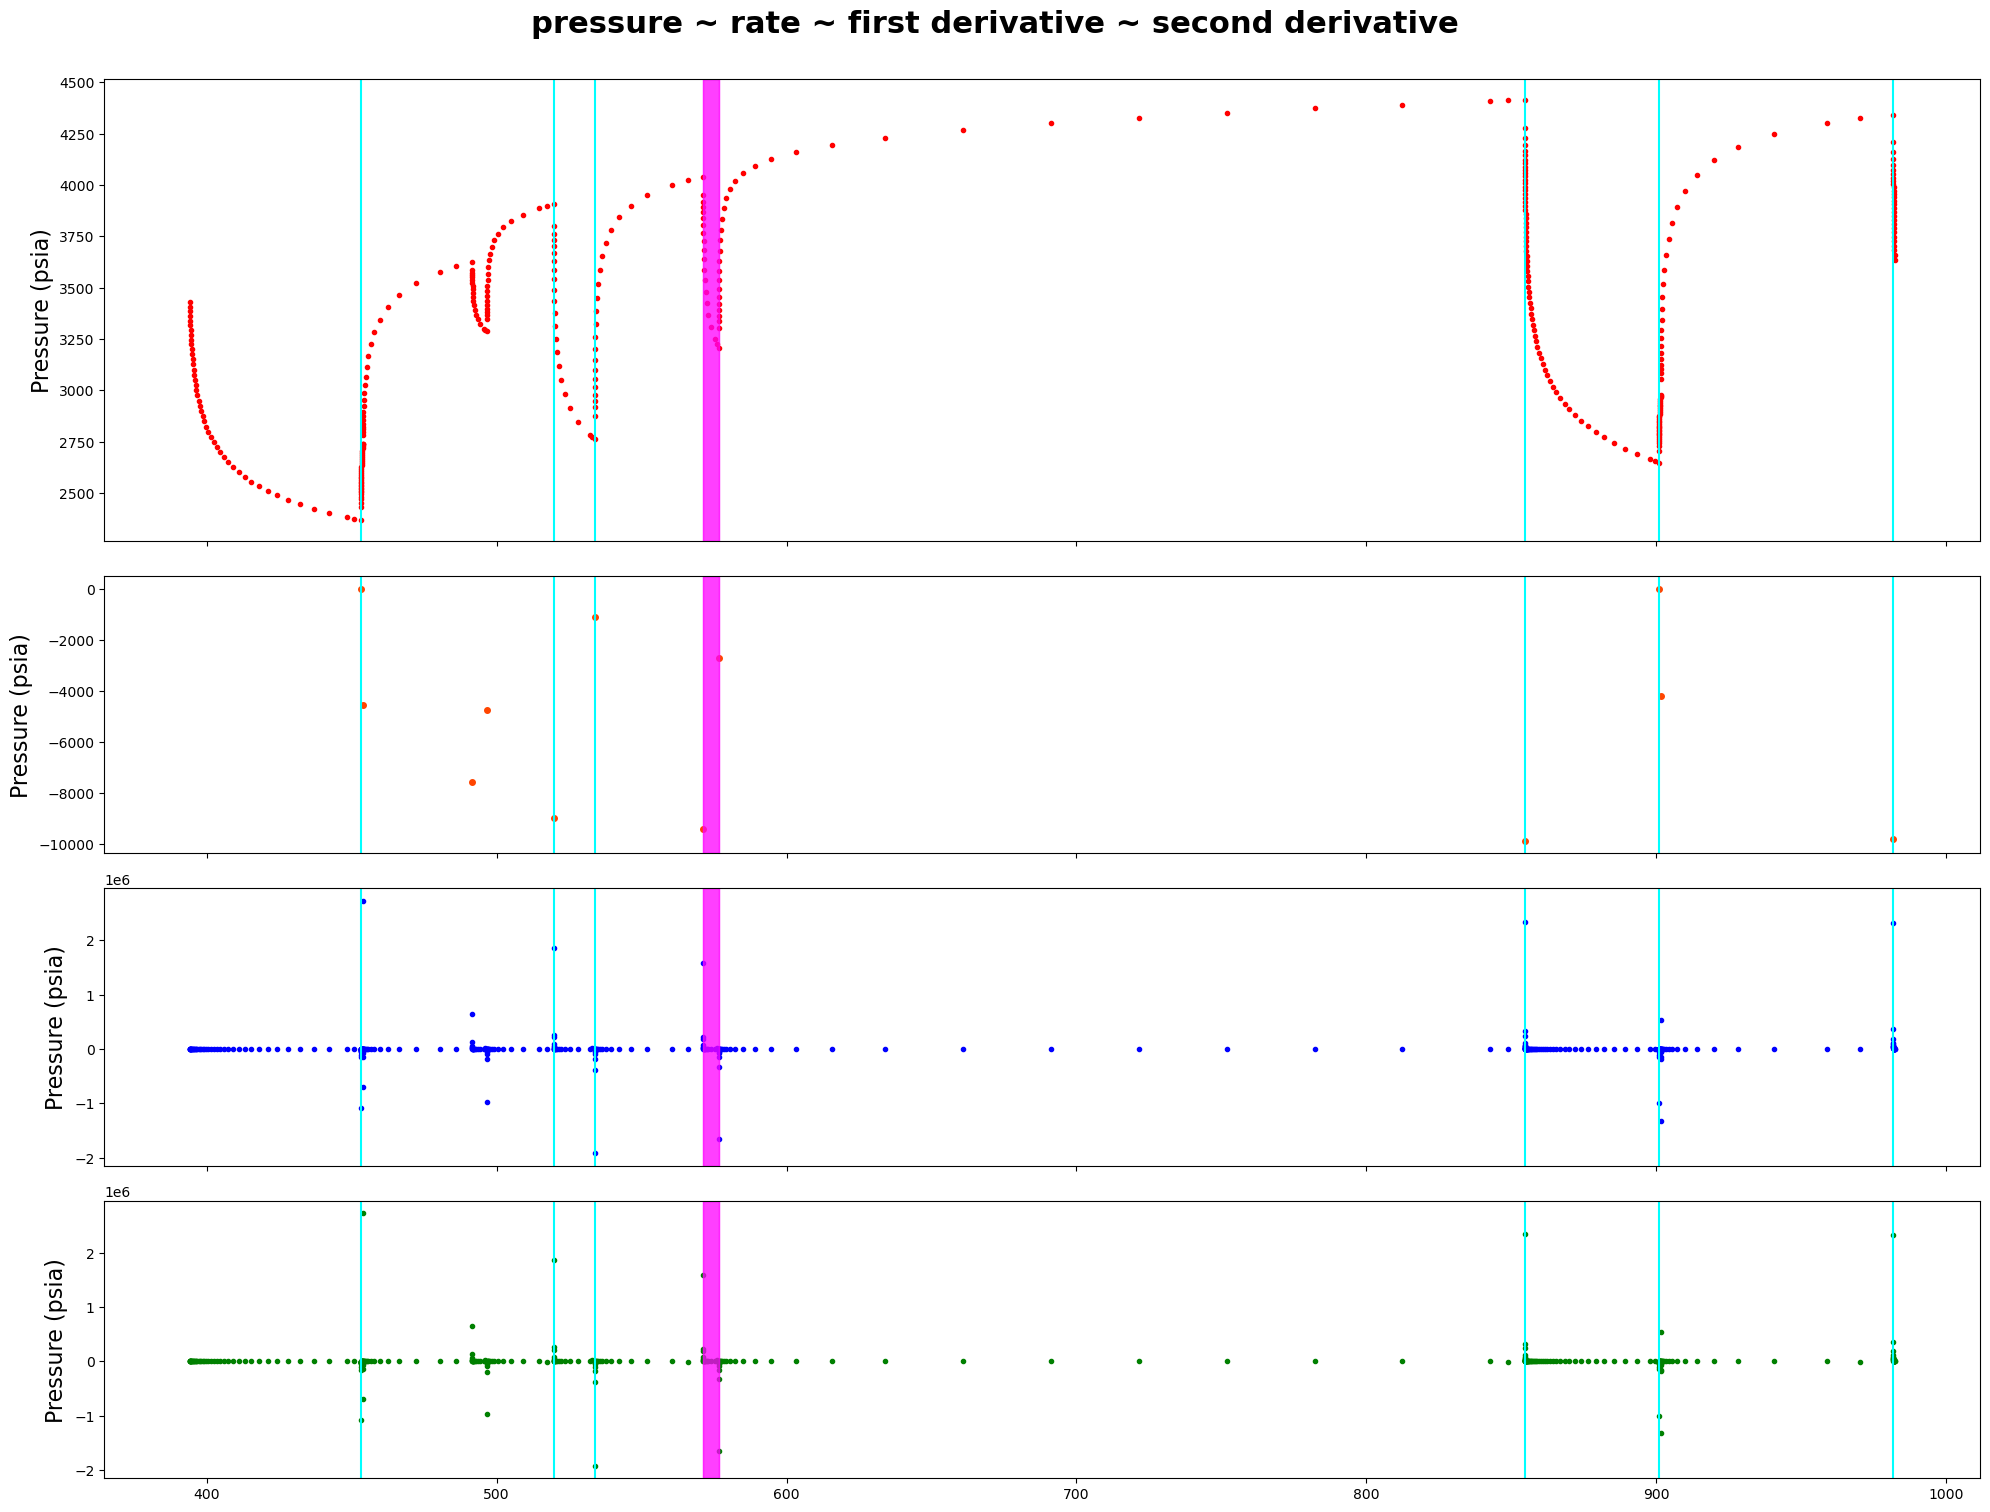

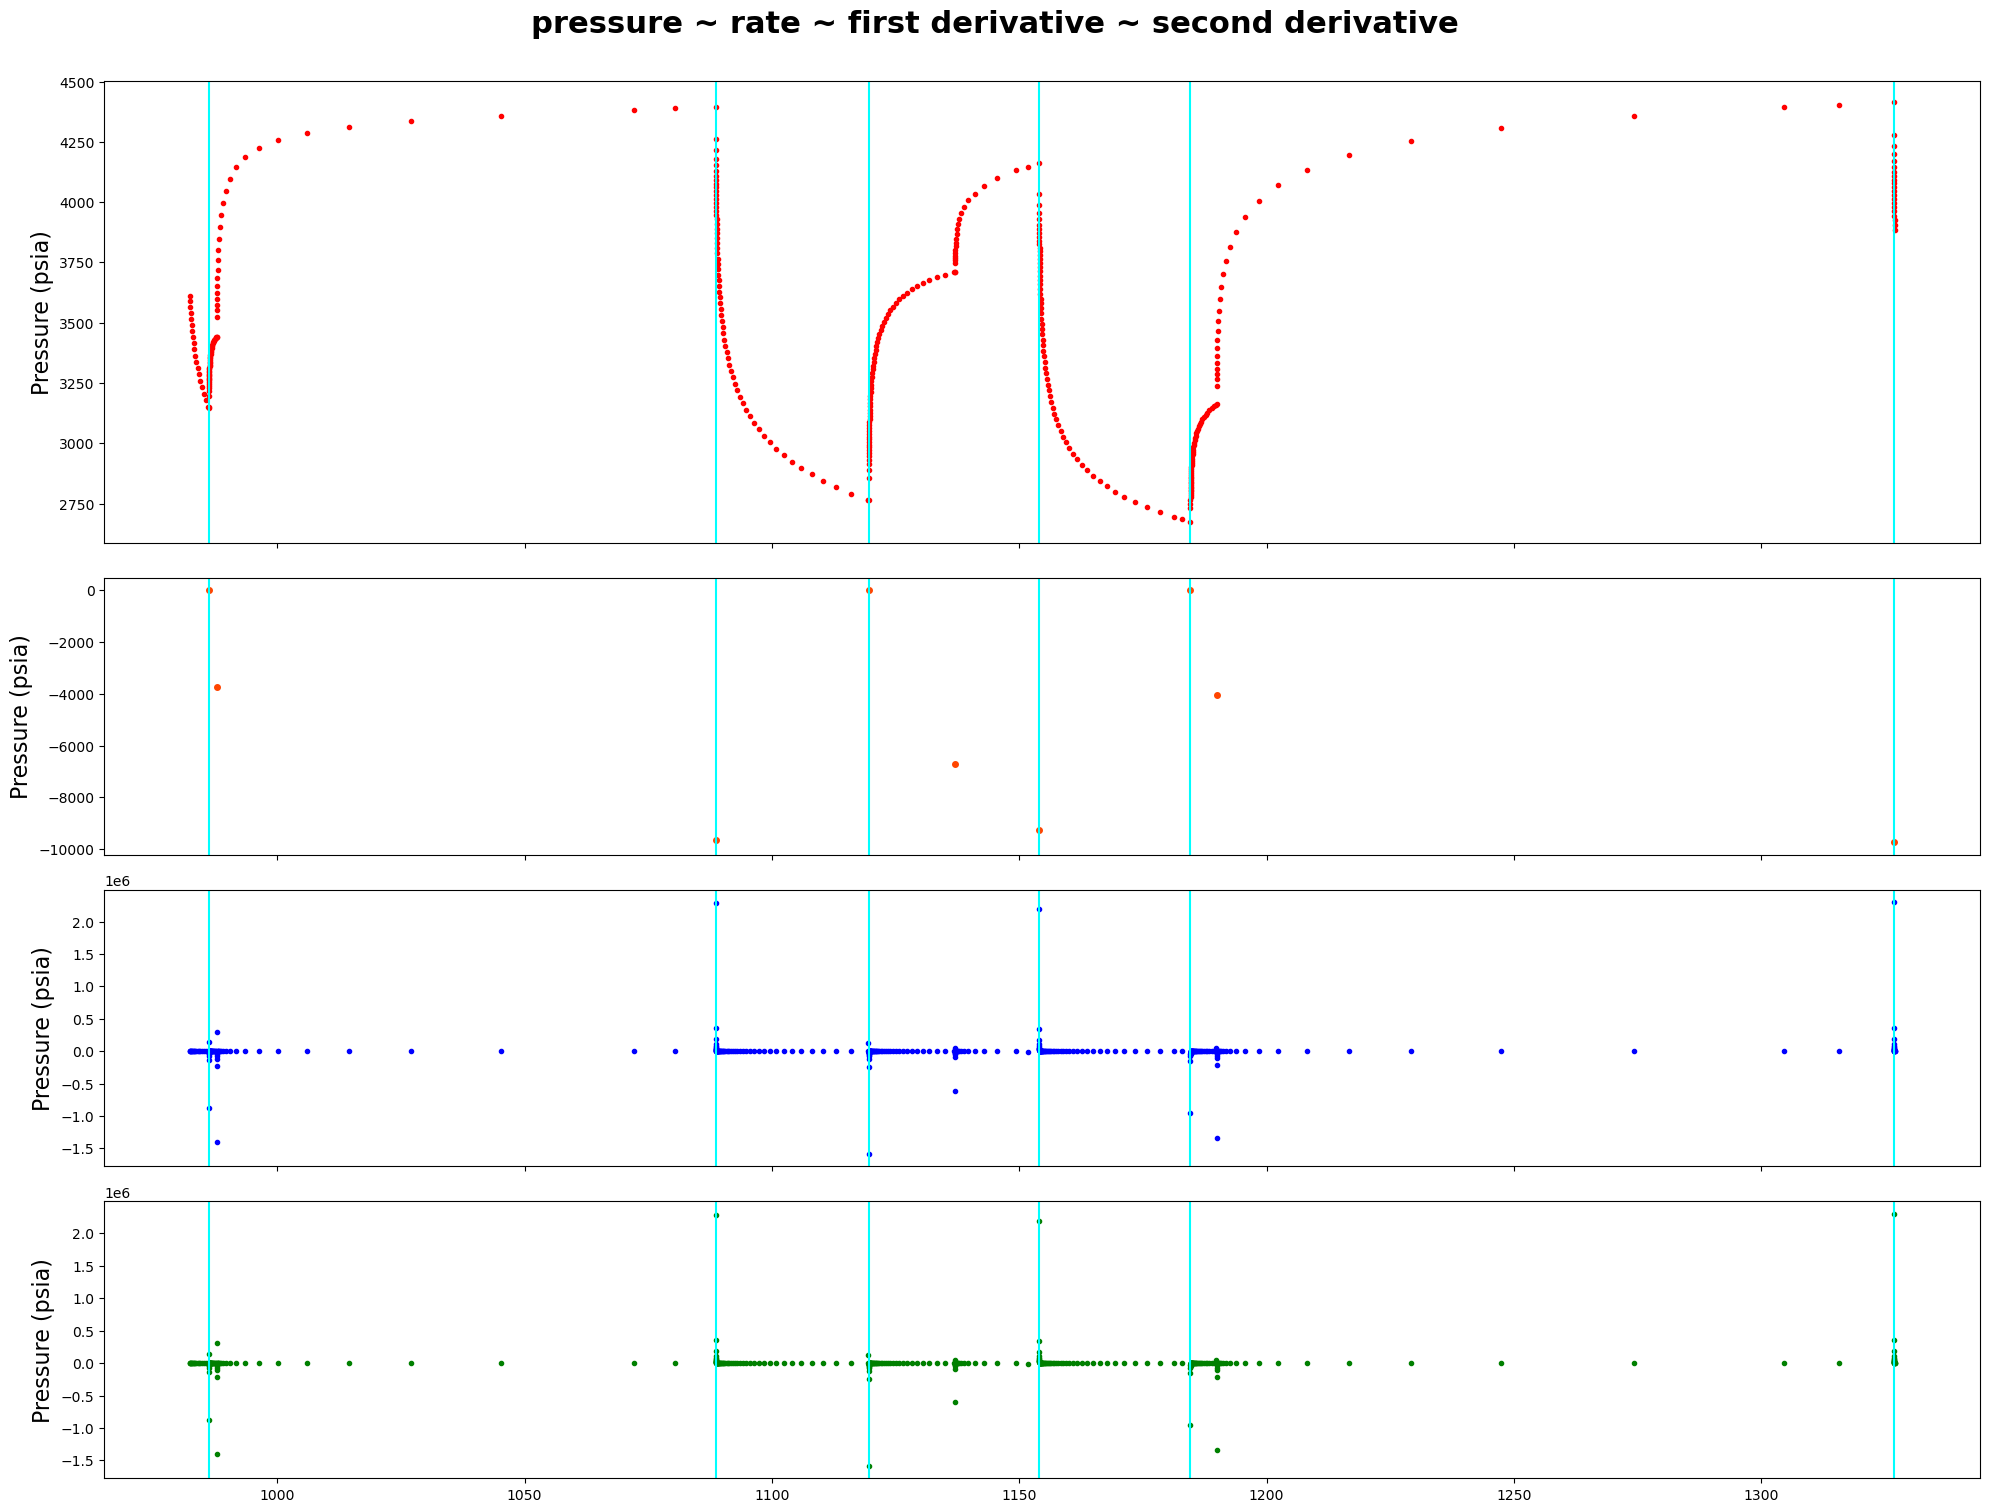

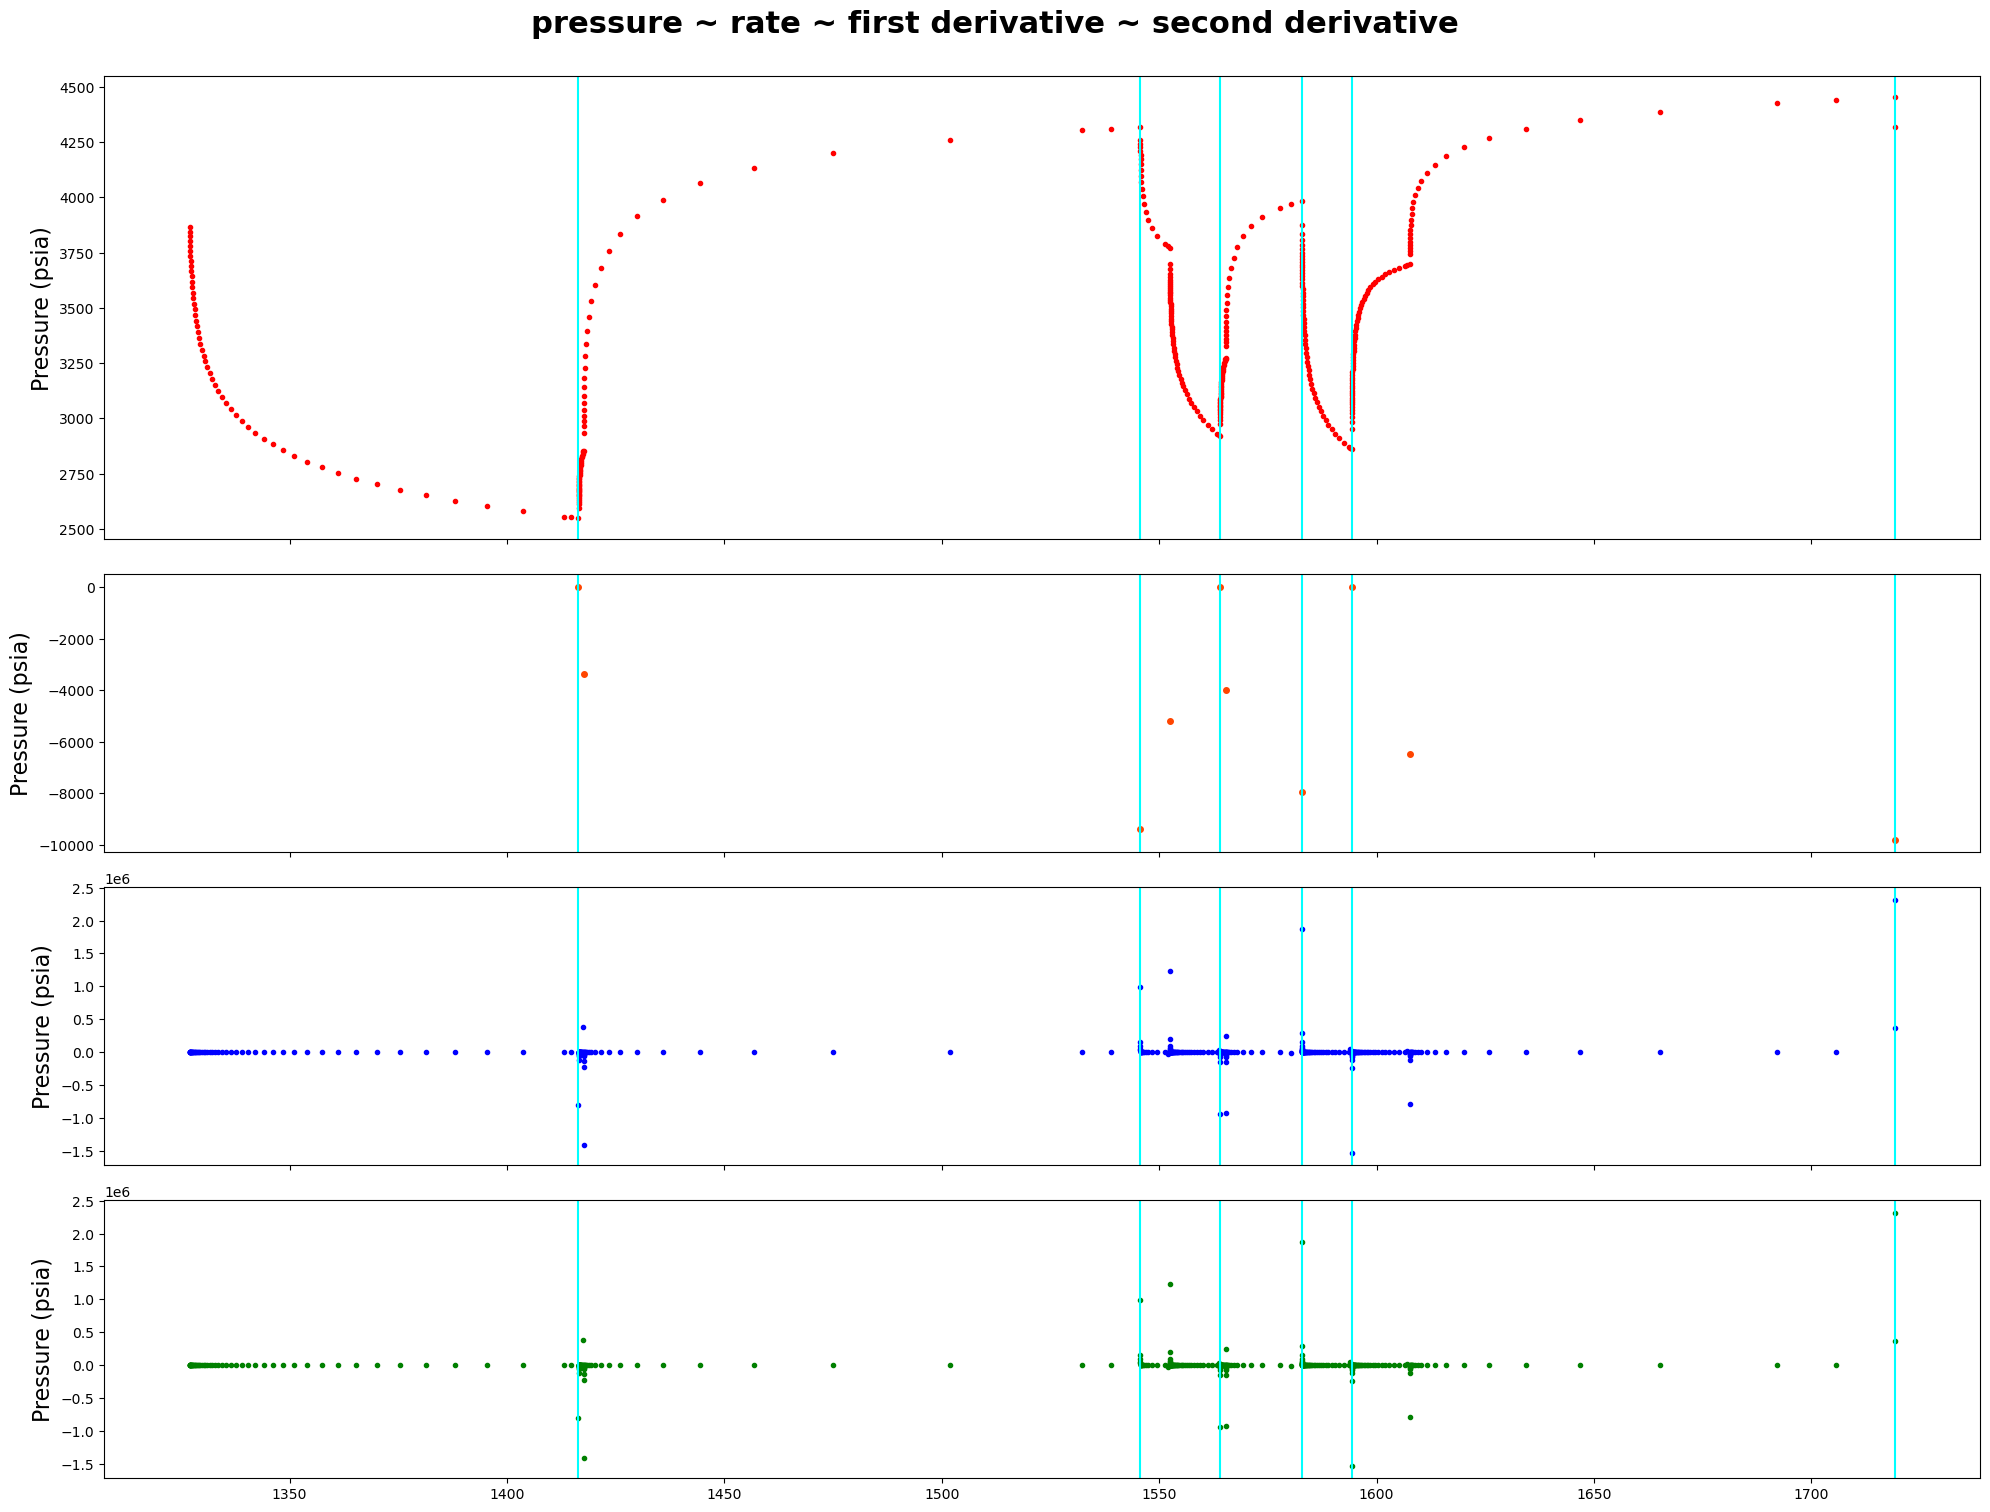

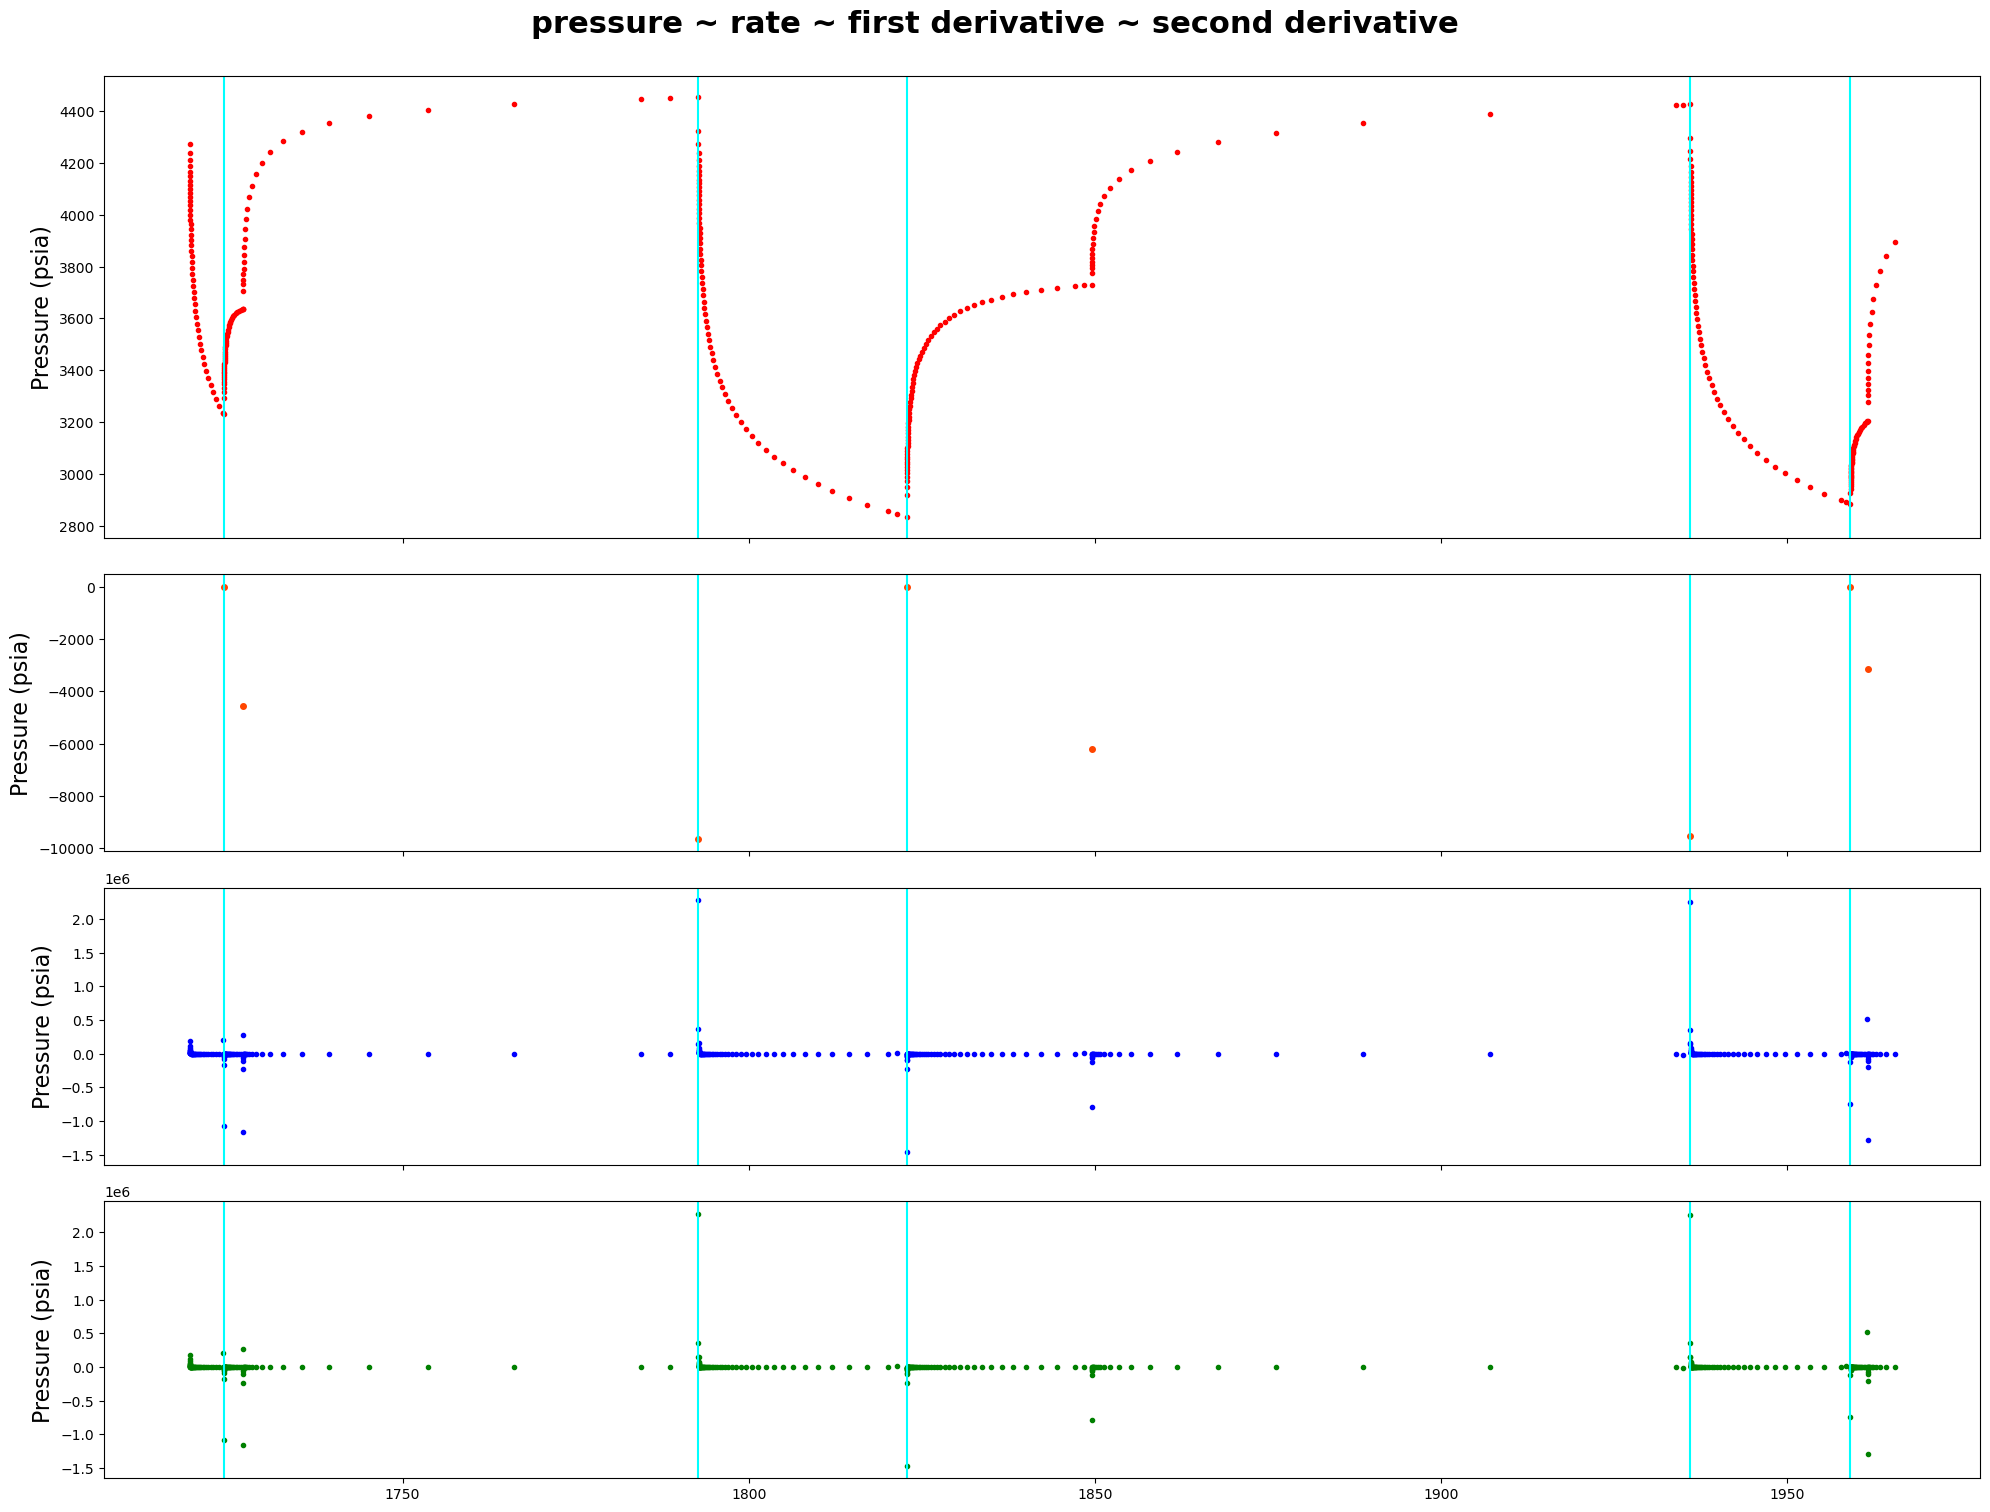

breakpoint,temp_index 2137 2
faulty_detected_transient [2137, 2156]
pressure_df[pressure_time][faulty_detected_transient[0]], 2543.8016666666667
pressure_df[pressure_time][faulty_detected_transient[1]], 2549.3016666666667
faulty_detected_transient [2137, 2156]
pressure_df[pressure_time][faulty_detected_transient[0]], 2543.8016666666667
pressure_df[pressure_time][faulty_detected_transient[1]], 2549.3016666666667
breakpoint,temp_index 2137 2
faulty_detected_transient [2137, 2156]
pressure_df[pressure_time][faulty_detected_transient[0]], 2543.8016666666667
pressure_df[pressure_time][faulty_detected_transient[1]], 2549.3016666666667
faulty_detected_transient [2137, 2156]
pressure_df[pressure_time][faulty_detected_transient[0]], 2543.8016666666667
pressure_df[pressure_time][faulty_detected_transient[1]], 2549.3016666666667
breakpoint,temp_index 2137 2
faulty_detected_transient [2137, 2156]
pressure_df[pressure_time][faulty_detected_transient[0]], 2543.8016666666667
pressure_df[pressure_time

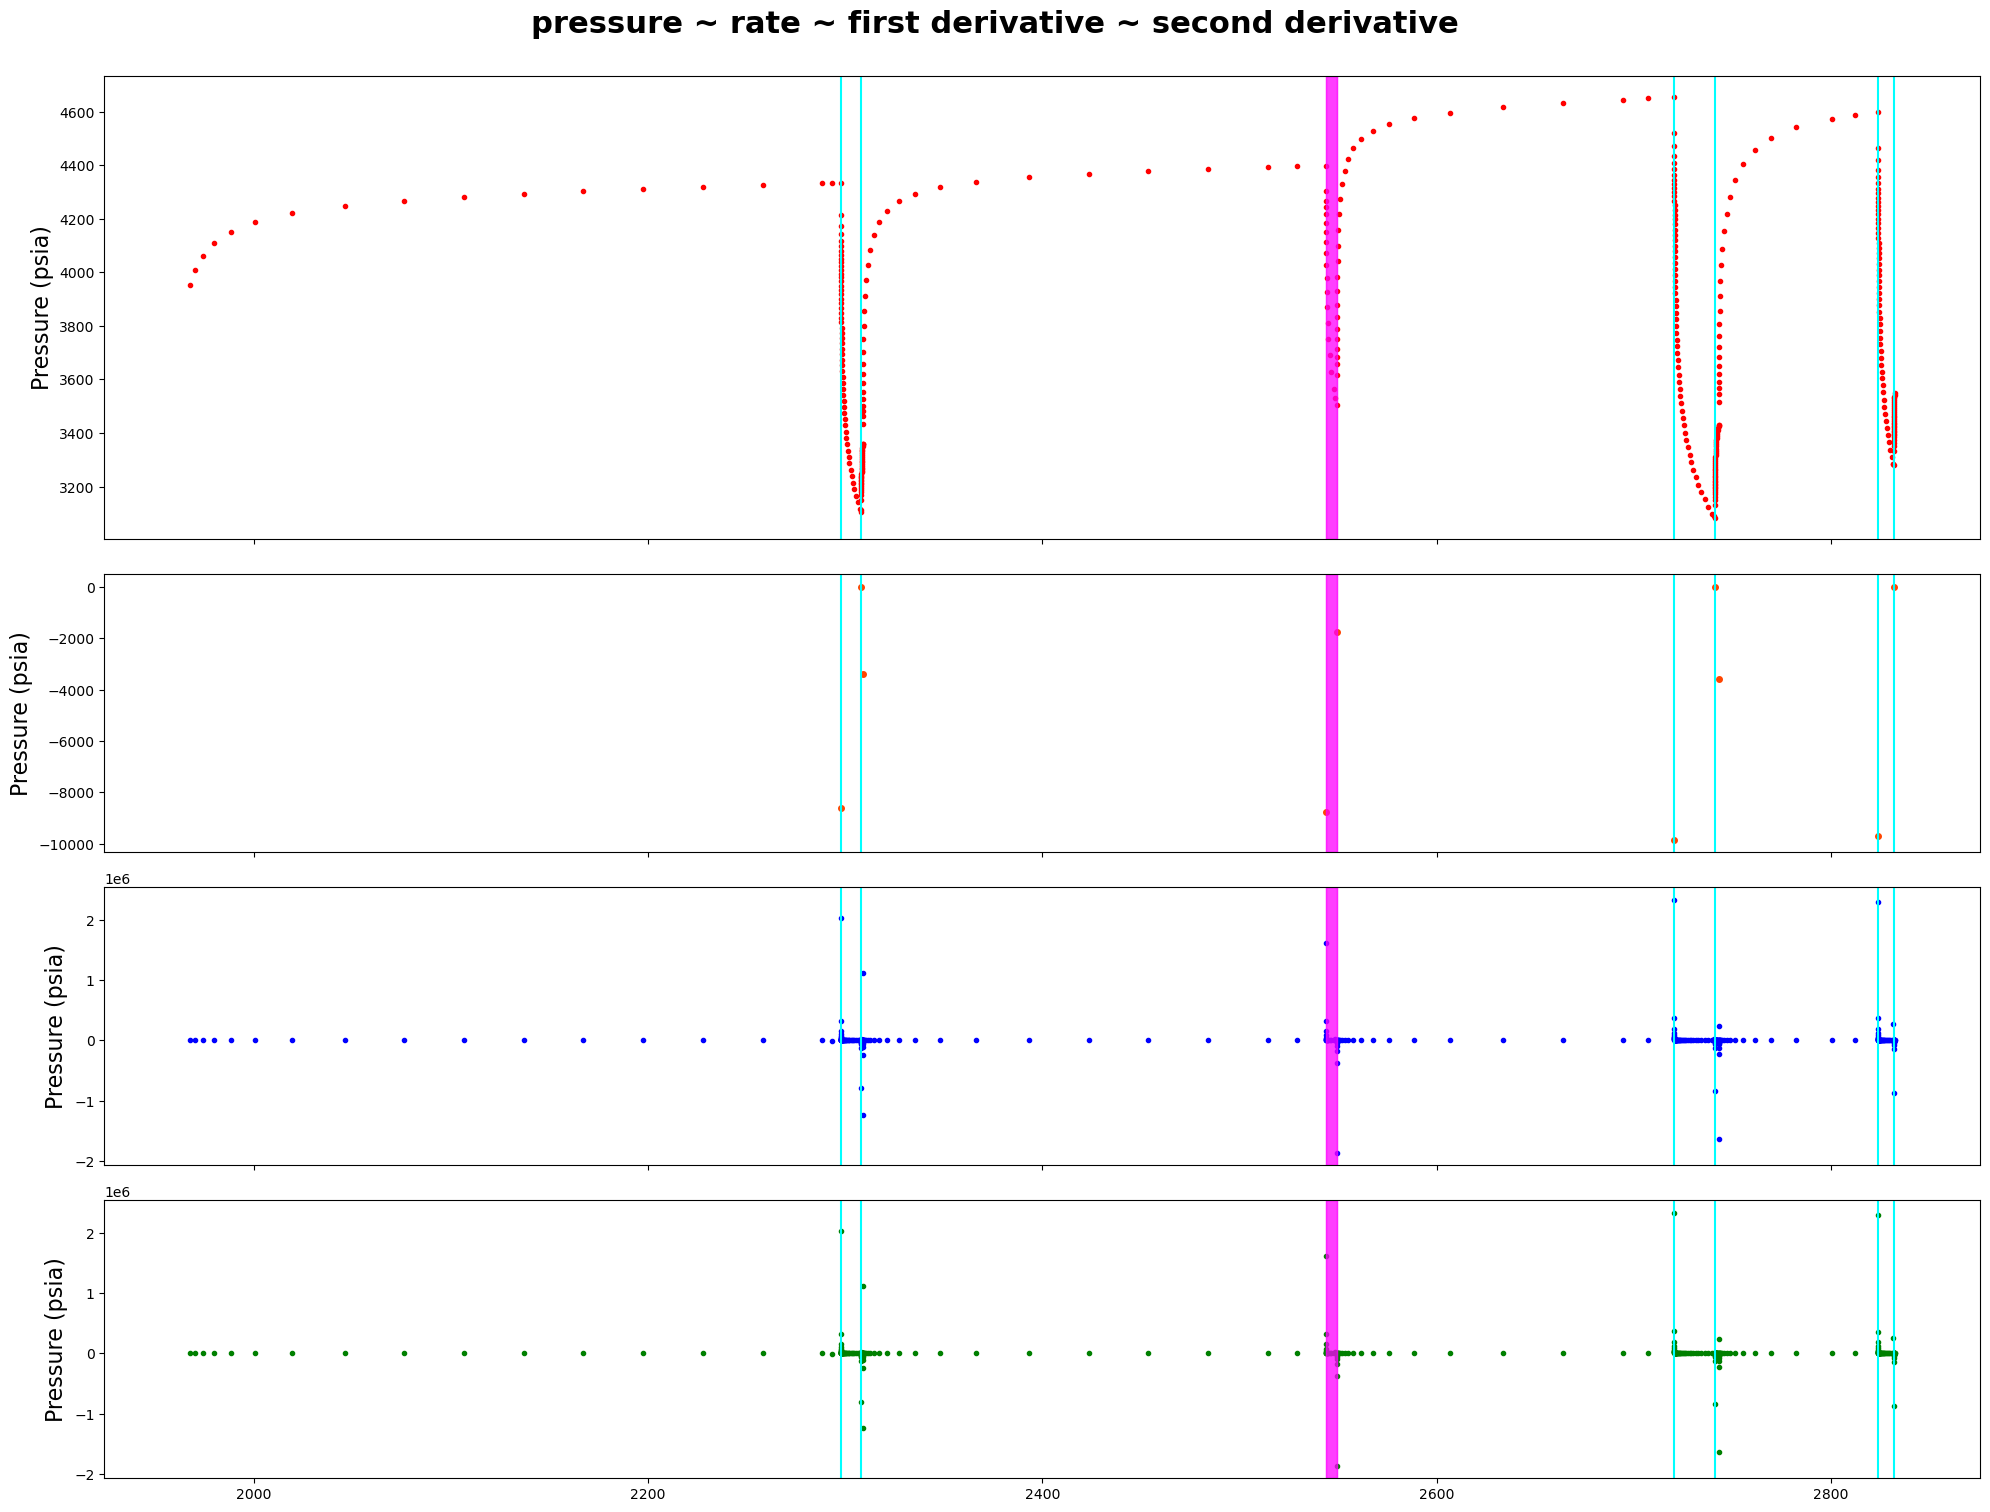

breakpoint,temp_index 2698 4
faulty_detected_transient [2698, 2713]
pressure_df[pressure_time][faulty_detected_transient[0]], 3135.6183333333333
pressure_df[pressure_time][faulty_detected_transient[1]], 3136.701666666667
faulty_detected_transient [2698, 2713]
pressure_df[pressure_time][faulty_detected_transient[0]], 3135.6183333333333
pressure_df[pressure_time][faulty_detected_transient[1]], 3136.701666666667
breakpoint,temp_index 2746 6
faulty_detected_transient [2746, 2764]
pressure_df[pressure_time][faulty_detected_transient[0]], 3428.951666666667
pressure_df[pressure_time][faulty_detected_transient[1]], 3432.6183333333333
faulty_detected_transient [2746, 2764]
pressure_df[pressure_time][faulty_detected_transient[0]], 3428.951666666667
pressure_df[pressure_time][faulty_detected_transient[1]], 3432.6183333333333
breakpoint,temp_index 2789 8
faulty_detected_transient [2789, 2807]
pressure_df[pressure_time][faulty_detected_transient[0]], 3471.951666666667
pressure_df[pressure_time][fau

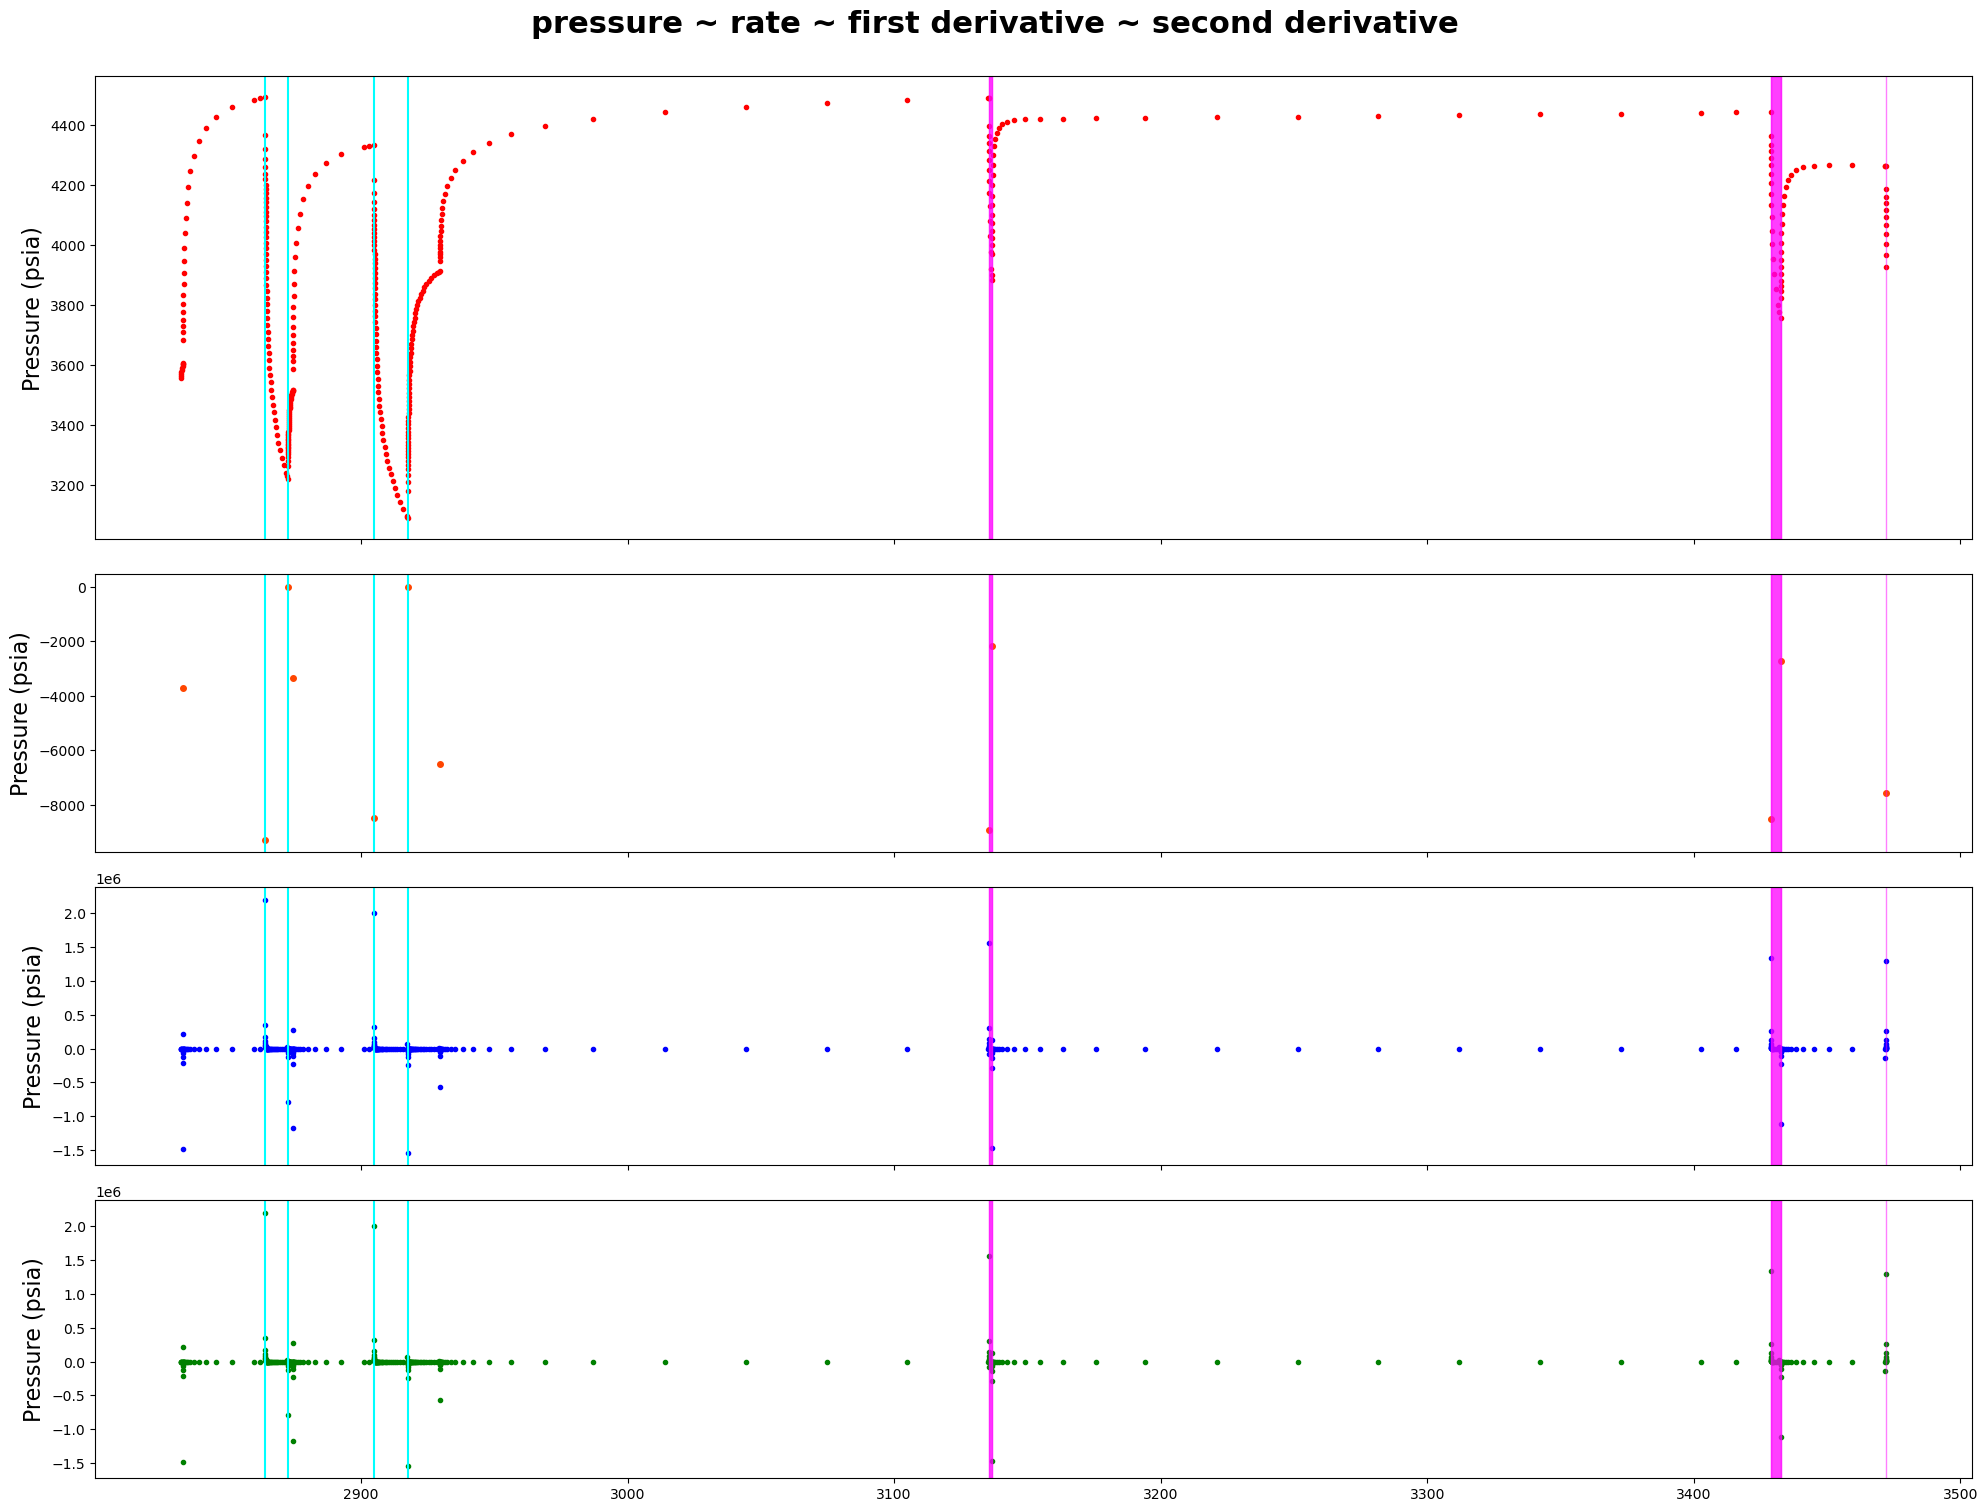

faulty_detected_transient [2789, 2807]
pressure_df[pressure_time][faulty_detected_transient[0]], 3472.3433333333332
pressure_df[pressure_time][faulty_detected_transient[1]], 3475.785
faulty_detected_transient [2789, 2807]
pressure_df[pressure_time][faulty_detected_transient[0]], 3472.3433333333332
pressure_df[pressure_time][faulty_detected_transient[1]], 3475.785
faulty_detected_transient [2789, 2807]
pressure_df[pressure_time][faulty_detected_transient[0]], 3472.3433333333332
pressure_df[pressure_time][faulty_detected_transient[1]], 3475.785
faulty_detected_transient [2789, 2807]
pressure_df[pressure_time][faulty_detected_transient[0]], 3472.3433333333332
pressure_df[pressure_time][faulty_detected_transient[1]], 3475.785


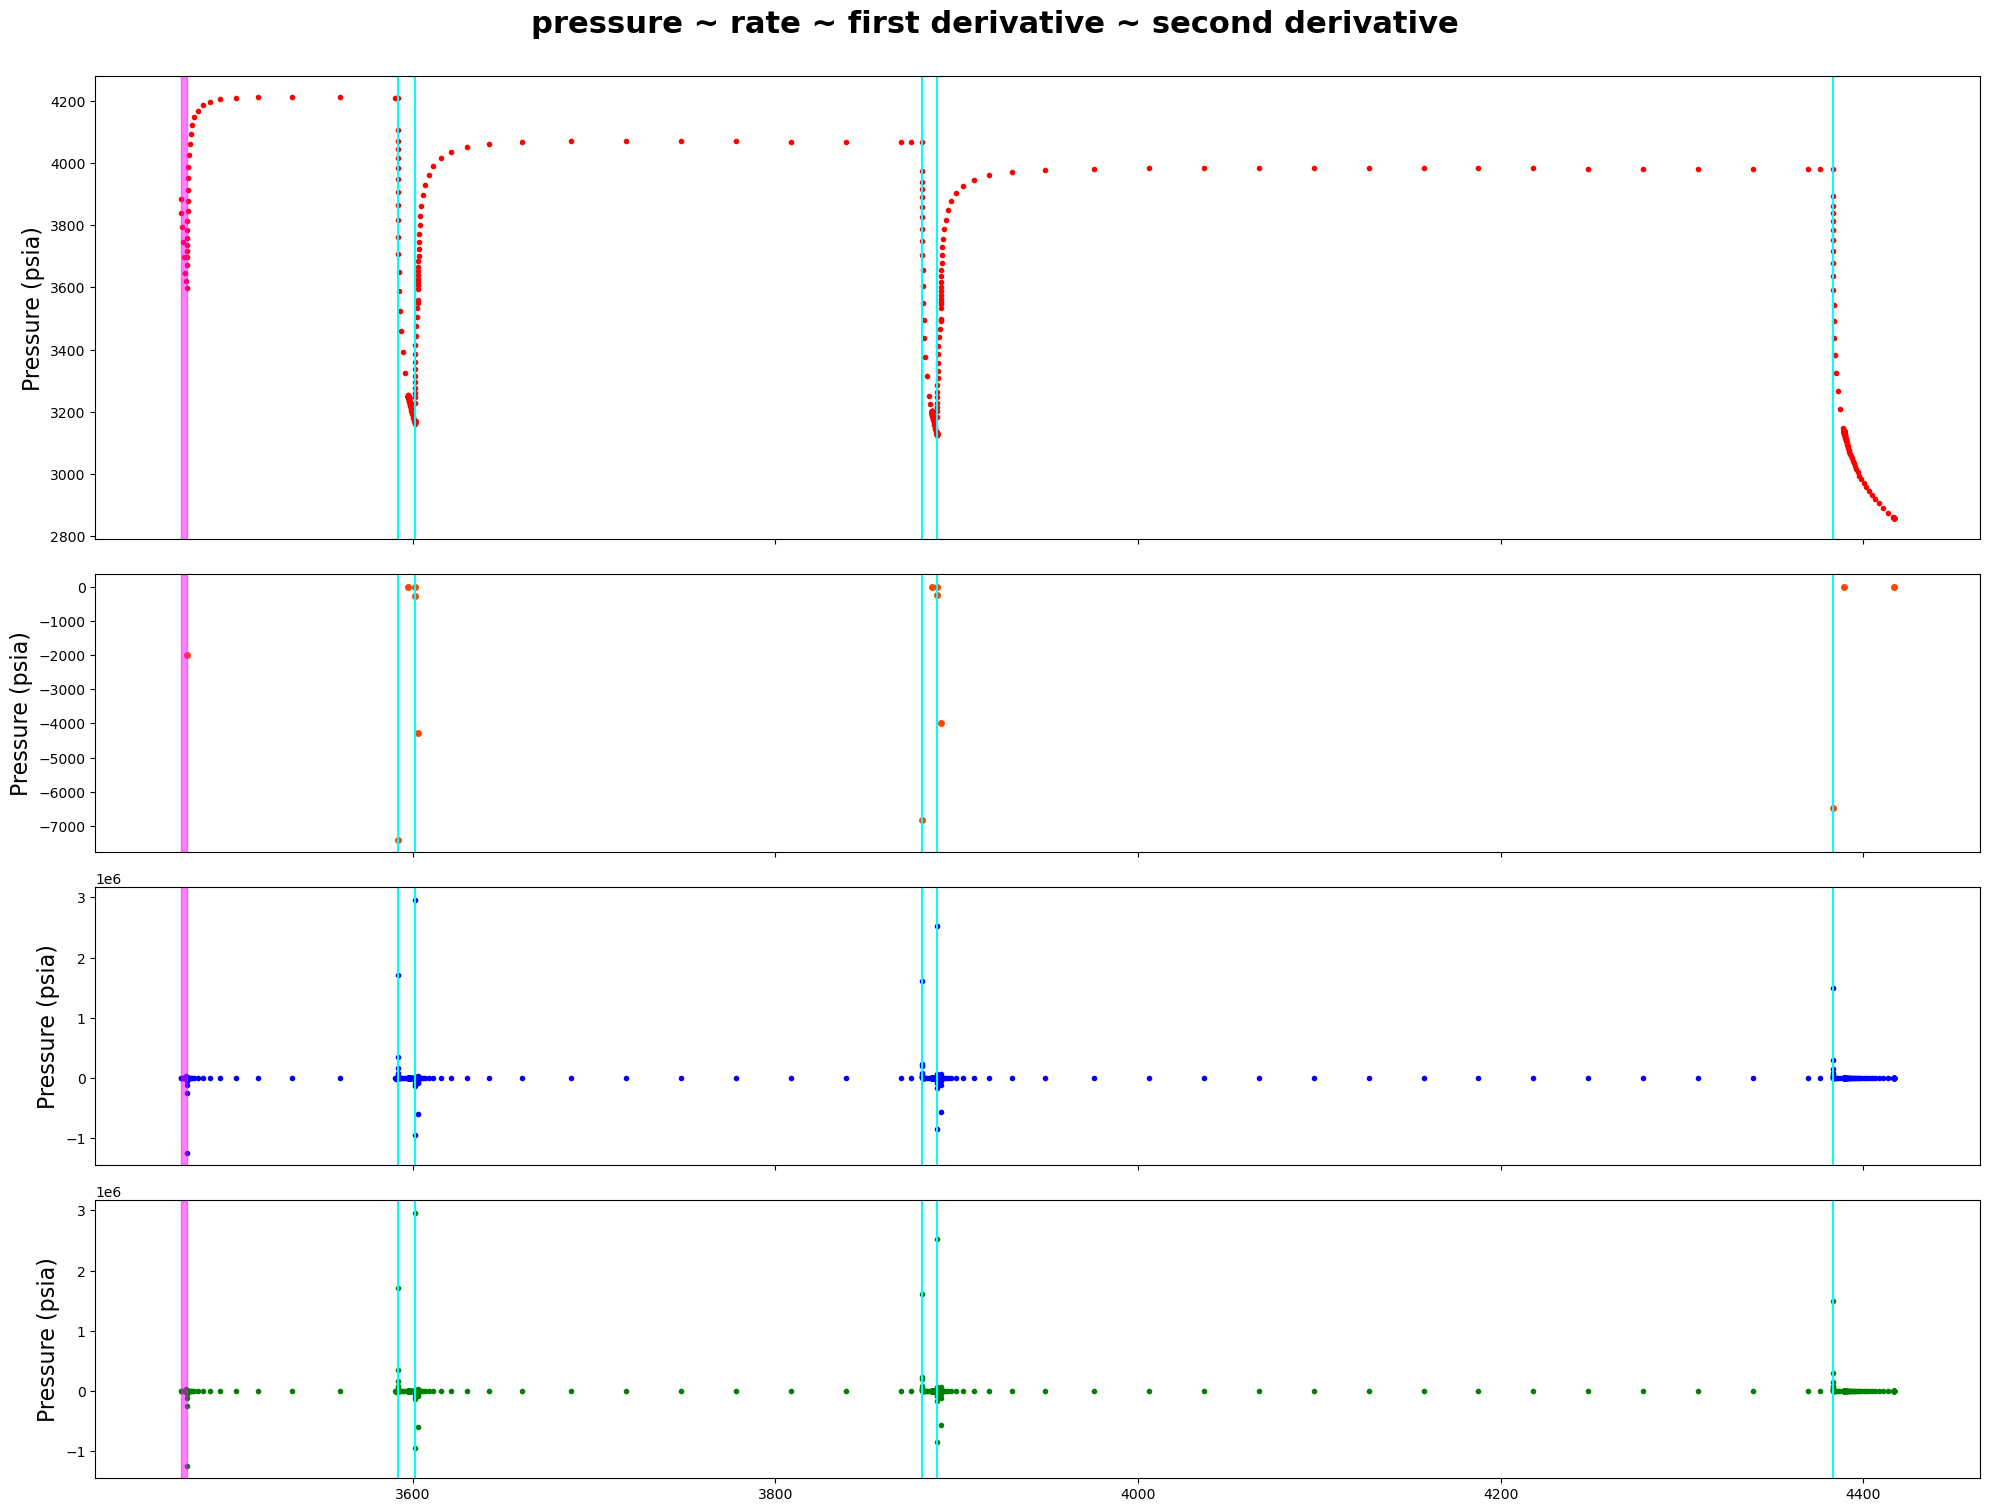

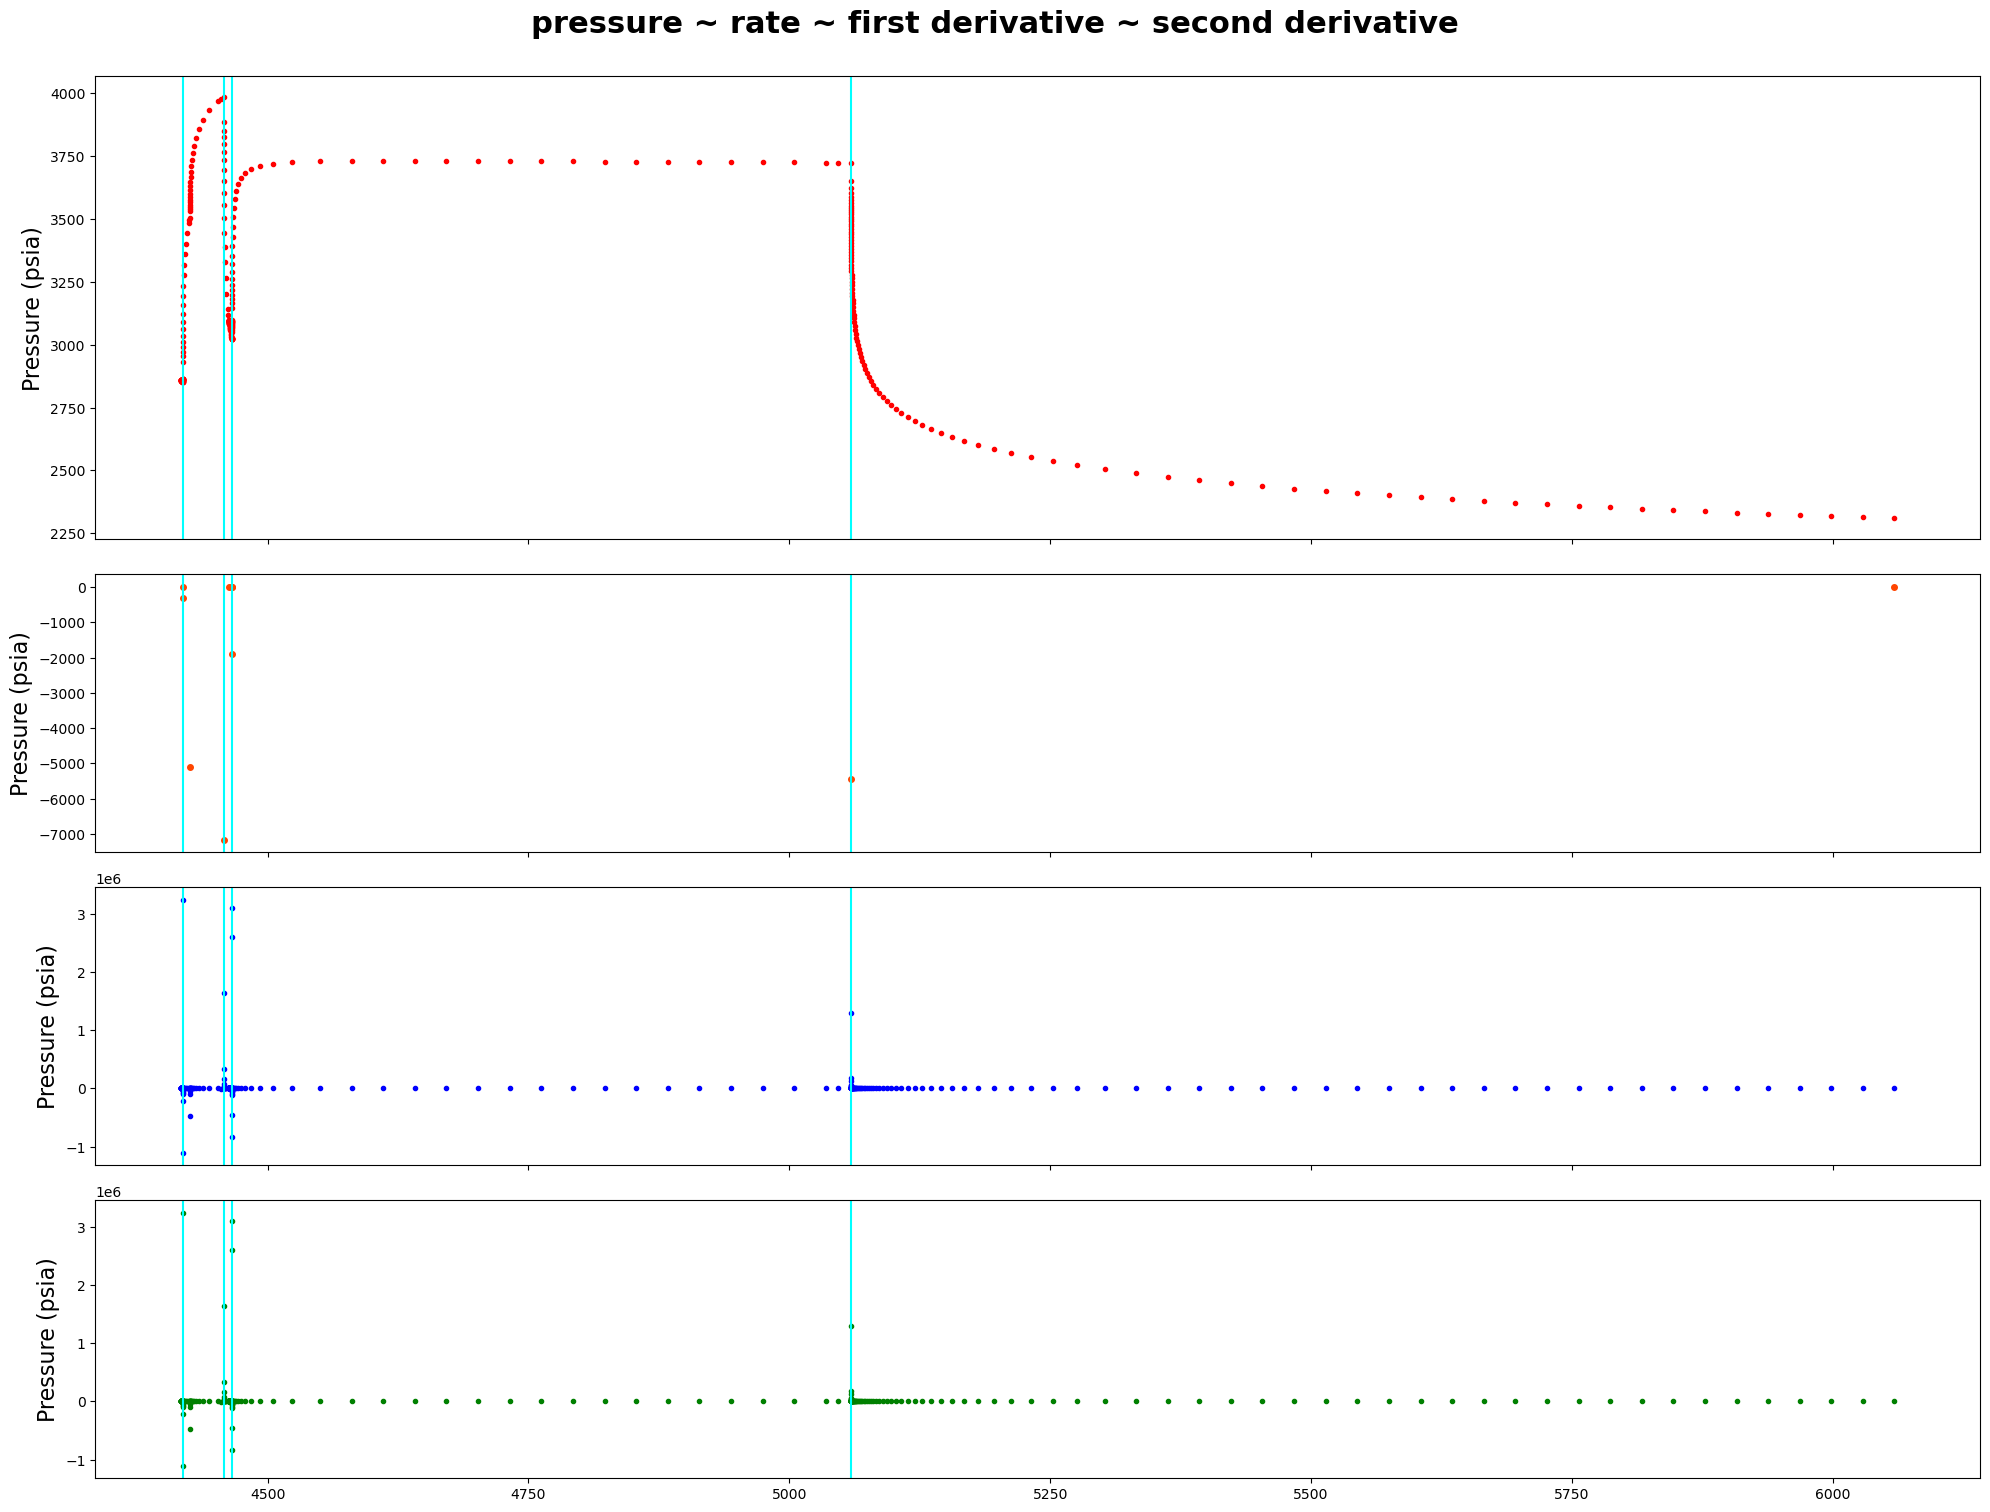

count_breakpoints 57


In [22]:
data_inOneRow=400
faulty_detectedBreakpoints=[592,611,2137,2156,2698,2713,2746,2764,2789,2807]
plot_4_metrics_details(data_inOneRow,
                       pressure_df,
                       rate_df,
                       breakpoints,
                       faulty_detectedBreakpoints,
                       colum_names)